In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-04-05 23:13:29--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [              <=>   ] 879.65M   974KB/s    in 40m 2s  

2024-04-05 23:53:31 (375 KB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [4]:
!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data/
-rw-r--r-- 1 root root 2.3G Apr  5 23:53 SUSY.csv


In [6]:
filename="SUSY.csv"


In [91]:
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [92]:
!head -500000 /content/SUSY.csv > Susy-small.csv


In [93]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [94]:
FeatureNames

['MET_rel',
 'MT2',
 'M_TR_2',
 'dPhi_r_b',
 'R',
 'S_R',
 'M_R',
 'axial_MET',
 'cos_theta_r1',
 'M_Delta_R']

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
filename = "Susy-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [50]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0          0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1          1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2          1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3          1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4          1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...        ...       ...       ...       ...       ...       ...       ...   
499995     0.0  0.719035  1.091879  0.291540  1.205962 -1.599117 -1.139445   
499996     1.0  0.910016 -0.364544 -0.777120  0.543648 -0.910632 -1.723707   
499997     1.0  0.842954  0.332476 -1.048564  1.347989  0.320496 -0.666358   
499998     0.0  1.370760 -1.162912  0.893499  2.118091  1.248496 -0.887211   
499999     0.0  0.762400  0.440924  0.342885  1.034283  1.740353 -1.083314   

             MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2         R  \
0       0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637  0.410772   
1       3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
2       1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
3       2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
4       1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
...          ...       ...       ...        ...       ...       ...       ...   
499995  0.424546  1.154849  0.637185  -0.091178  1.972156  0.697028  0.313636   
499996  2.864673  1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499997  0.450433 -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499998  0.164659  0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499999  0.872145 -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0       1.145621  1.932632   0.994464  1.367815      0.040714  
1       0.000000  0.448410   0.205356  1.321893      0.377584  
2       2.024308  0.603498   1.562374  1.135454      0.180910  
3       1.551914  0.761215   1.715464  1.492257      0.090719  
4       0.000000  1.083158   0.043429  1.154854      0.094859  
...          ...       ...        ...       ...           ...  
499995  0.988602  1.981573   0.744828  1.095080      0.006546  
499996  1.195041  0.910815   1.181893  1.252362      0.826035  
499997  0.591989  0.372003   0.716788  0.366991      0.265798  
499998  0.308067  3.098183   0.233042  0.876216      0.000593  
499999  1.020396  0.996446   0.943458  1.299870      0.197220  

[500000 rows x 19 columns]

In [97]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


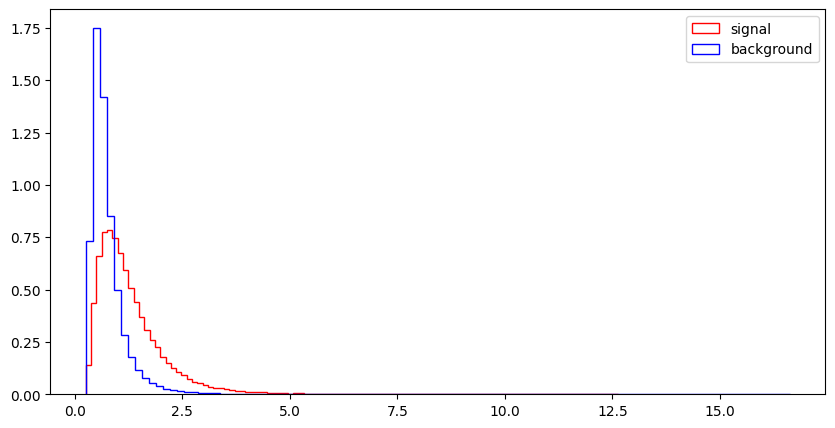

l_1_eta


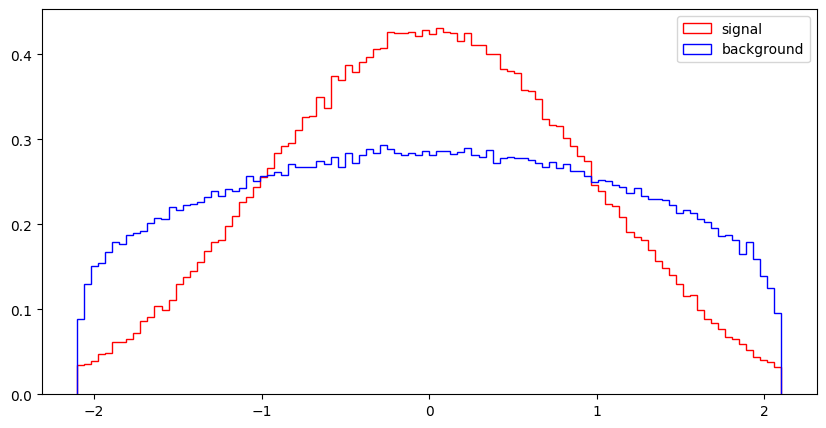

l_1_phi


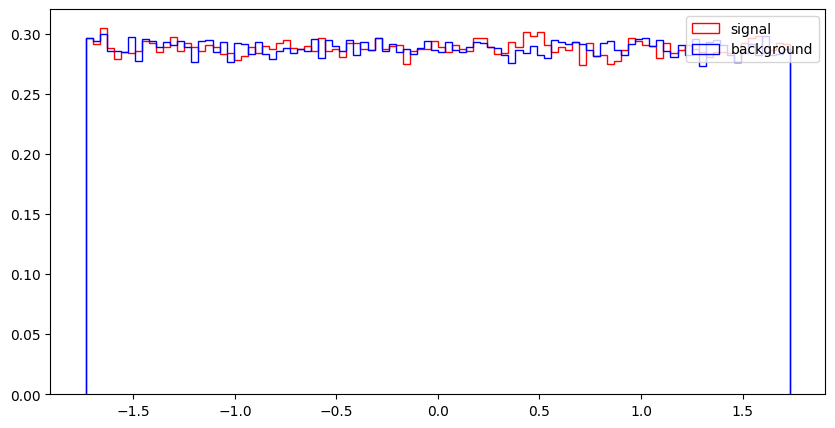

l_2_pT


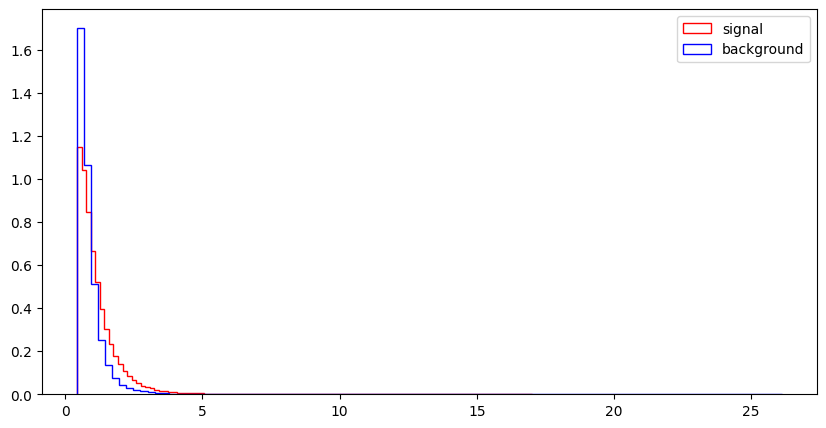

l_2_eta


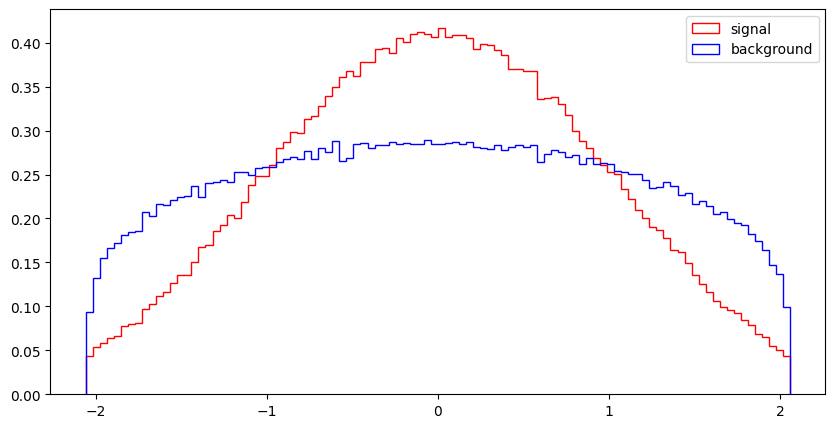

l_2_phi


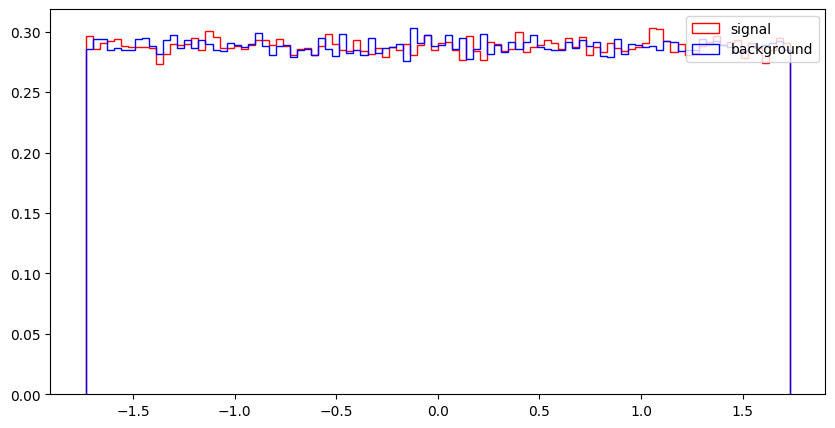

MET


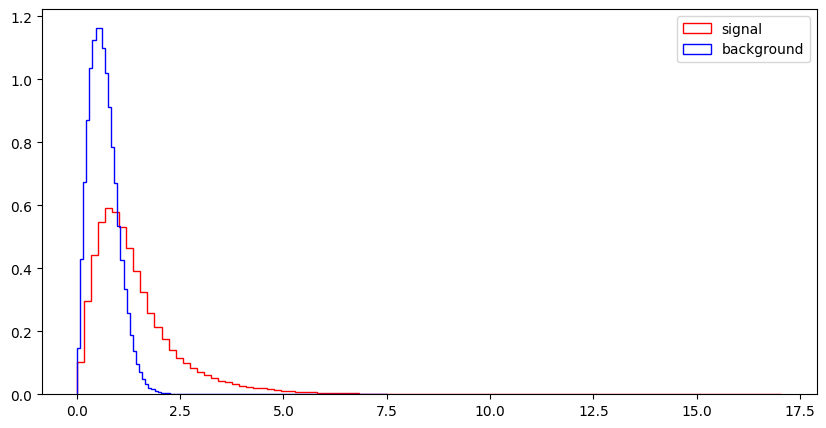

MET_phi


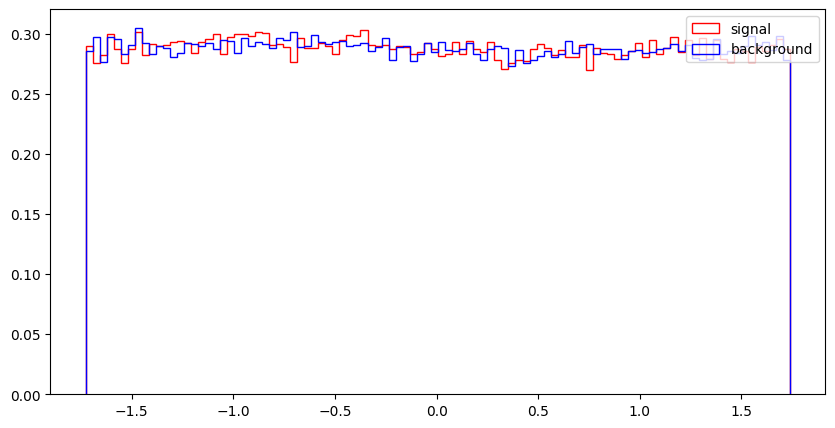

MET_rel


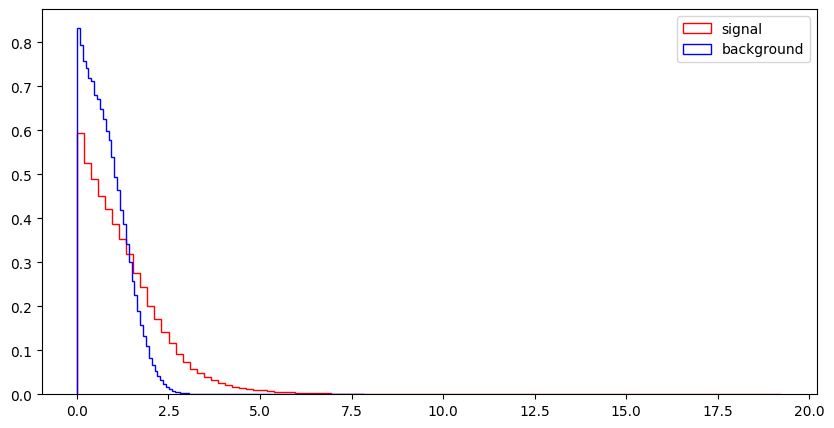

axial_MET


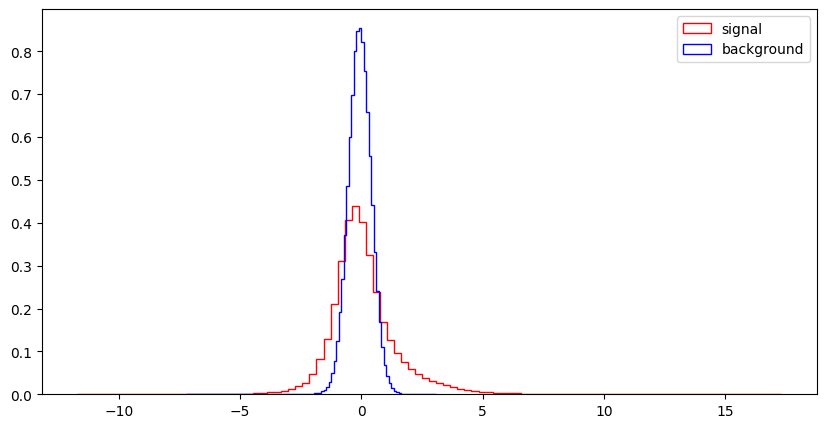

M_R


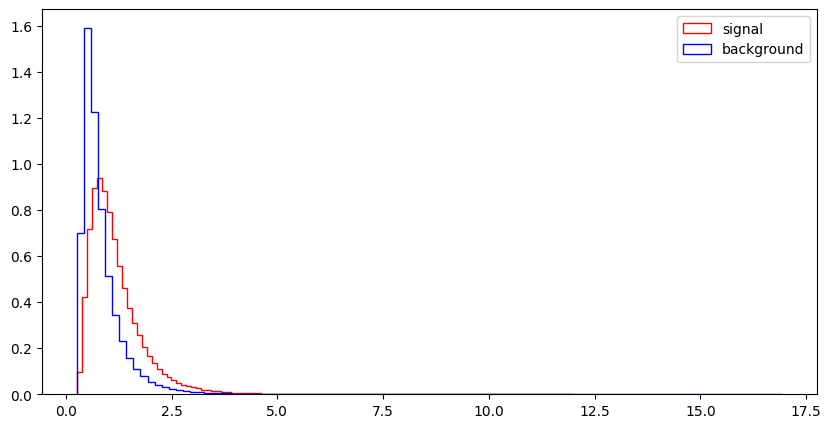

M_TR_2


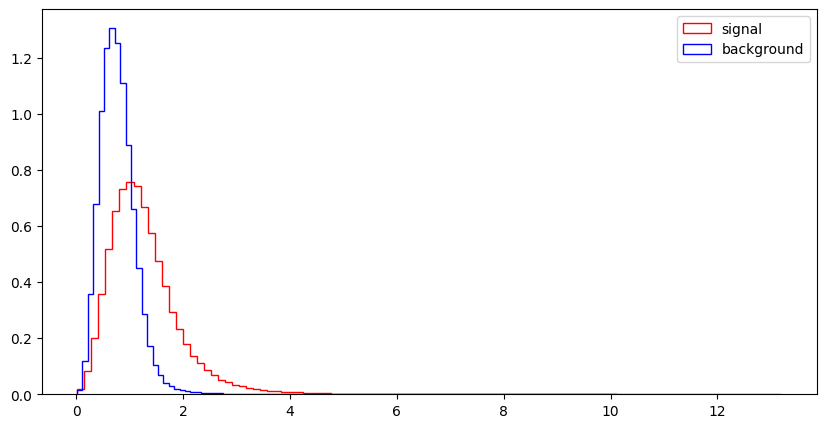

R


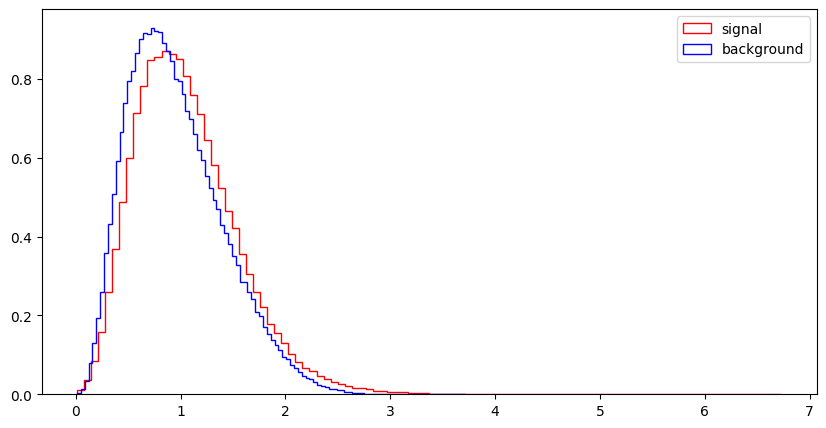

MT2


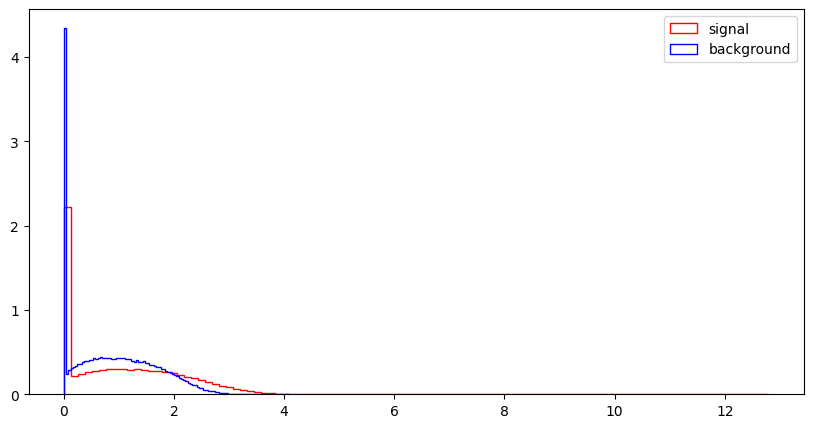

S_R


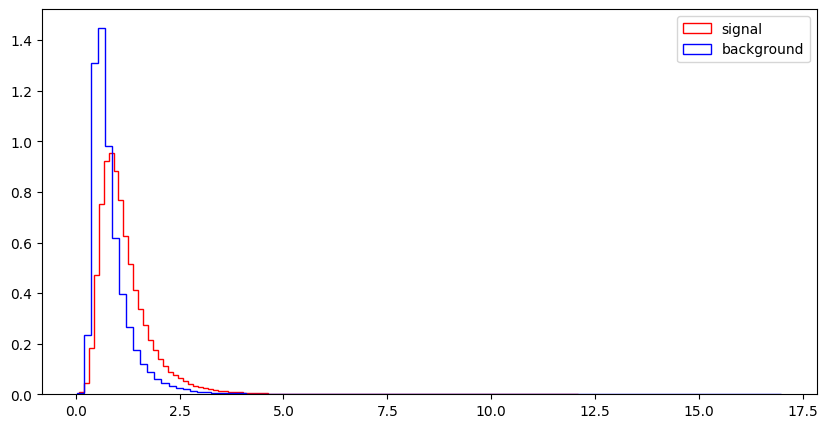

M_Delta_R


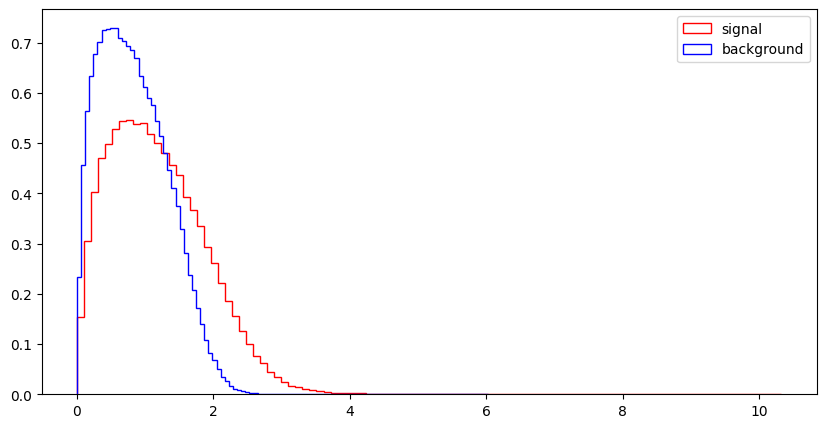

dPhi_r_b


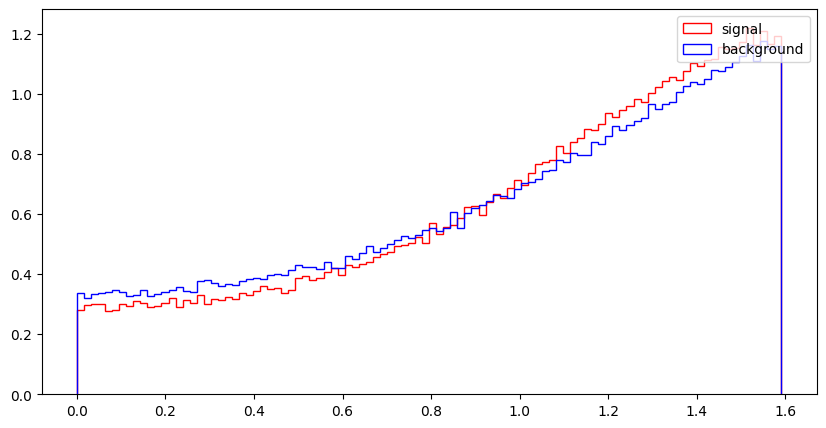

cos_theta_r1


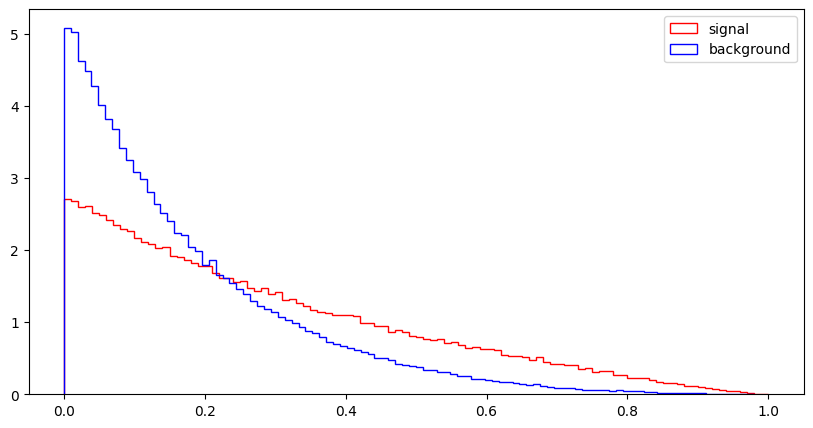

In [98]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

Text(0, 0.5, 'l_1_pT')

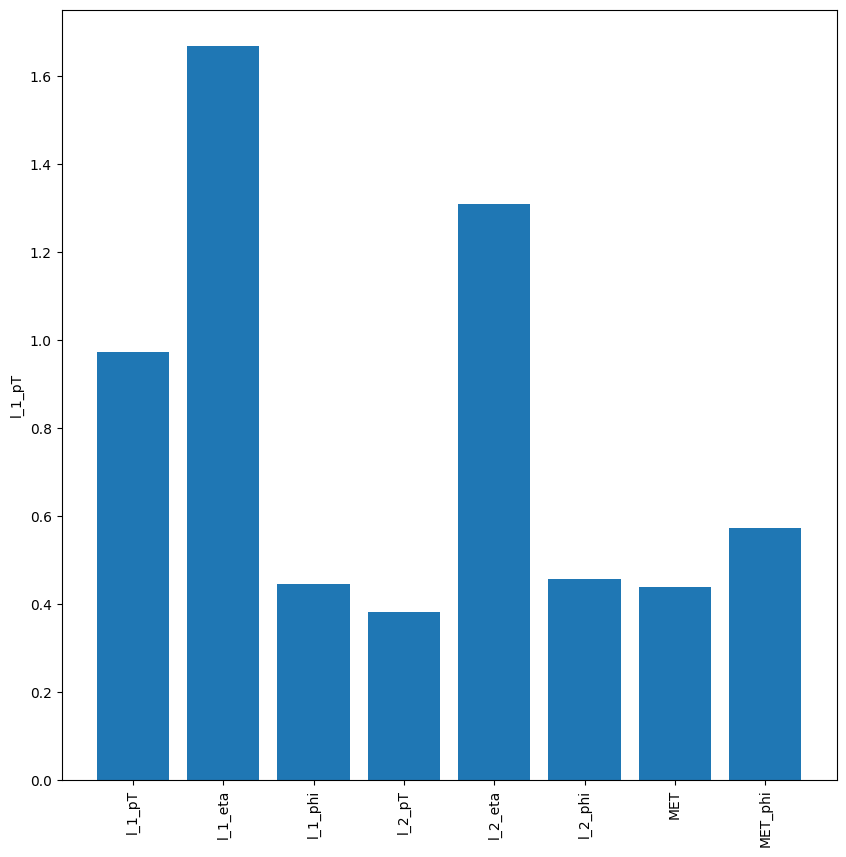

In [53]:
low_level_labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_labels = ['MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #separated column names into low and high levels

fig, ax = plt.subplots(1, 1, figsize=(10, 10)) #subplot with figure size set to 10,10

ax.bar(range(8), df[df.columns[1]][0:8])
ax.set_xticks(range(8))
ax.set_xticklabels(low_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


Text(0, 0.5, 'l_1_pT')

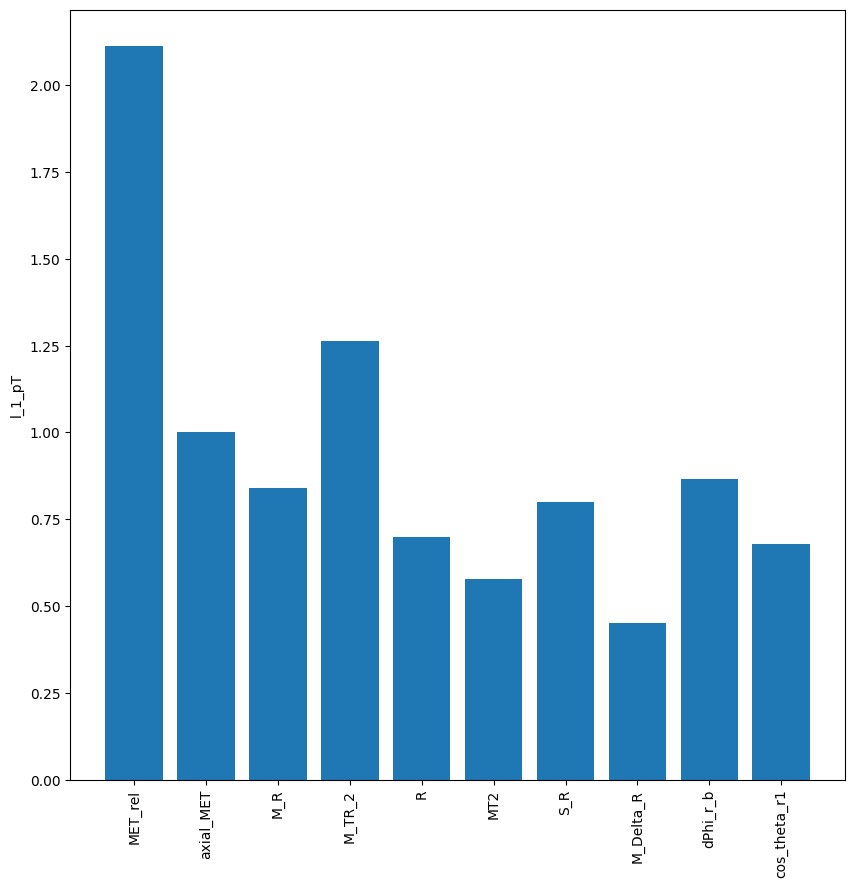

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.bar(range(10), df[df.columns[1]][8:18])
ax.set_xticks(range(10))
ax.set_xticklabels(high_level_labels, rotation='vertical', fontsize=10)
ax.set_ylabel(df.columns[1])


In [55]:
##################################doesn't work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def makepairplots(df, labels):
    num_features = len(labels)#number of features

    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))#creates figure and array of subplots

    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(num_features):
        for j in range(num_features):#loop per column
            if i == j:#on diagonal
                axes[i, j].hist(df[df.columns[i]], bins=30, color='skyblue', edgecolor='black')#plots histogram of column val
                axes[i, j].set_xlabel(labels[i])
                axes[i, j].set_ylabel('Frequency')
            else:#nondiagonal scatterplot
                axes[i, j].scatter(df[df.columns[j]], df[df.columns[i]], s=1, alpha=0.5, color='orange') #plots scatterplot to value of 2 columns
                axes[i, j].set_xlabel(labels[j]) #sets x axis label to feature name
                axes[i, j].set_ylabel(labels[i])

    plt.tight_layout() #this changes subplot paramters
    plt.show()

labels = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi',
          'MET_rel', 'axial_MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos_theta_r1'] #labels for the features




In [ ]:
makepairplots(df, labels)
#tried to run this and "session crashed after using all available RAM"

In [ ]:
#don't know how to make this run faster since it doesn't run at all

In [ ]:
#as far as observables go i can't figure it out since it wont run

In [ ]:
######################################################################3
def snspairplotlow(susy_data):

    low_level_features = susy_data.iloc[:, :8]
    print("Pair plots for Low-level Features")
    sns.pairplot(low_level_features)
    plt.show()

Pair plots for Low-level Features


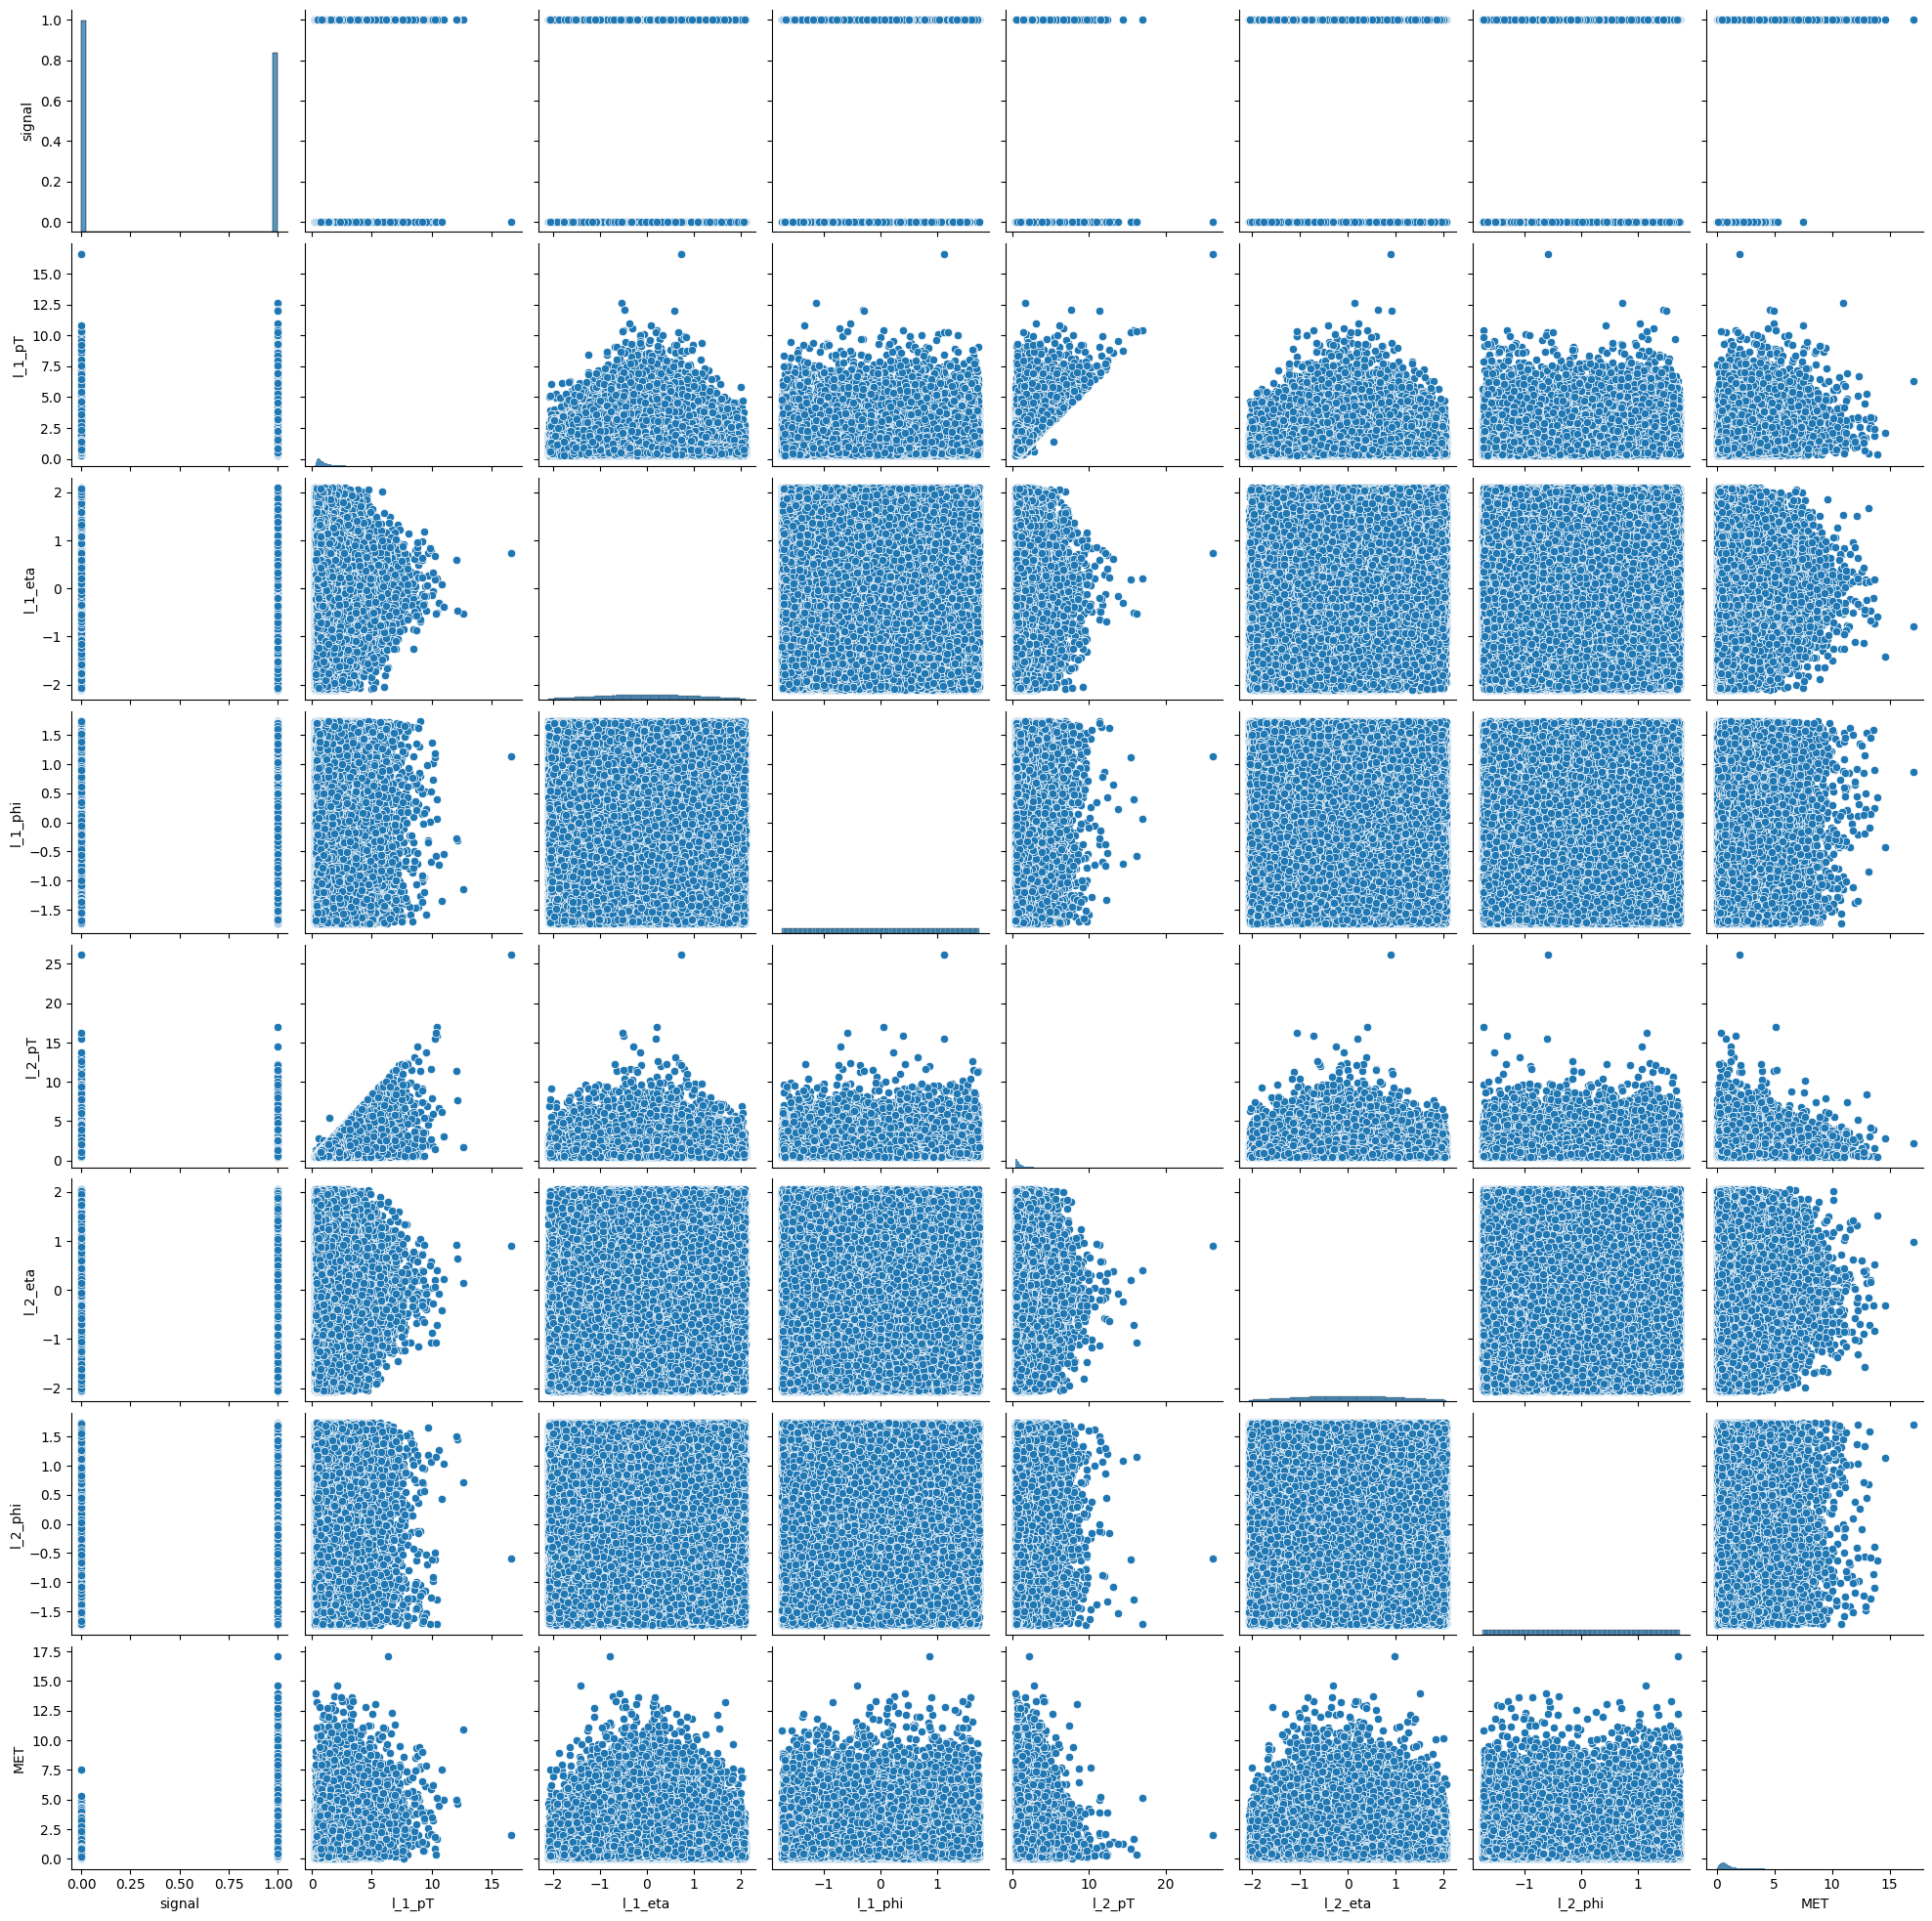

Pair plots for High-level Features


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fc71f725120> (for post_execute):


KeyboardInterrupt: 

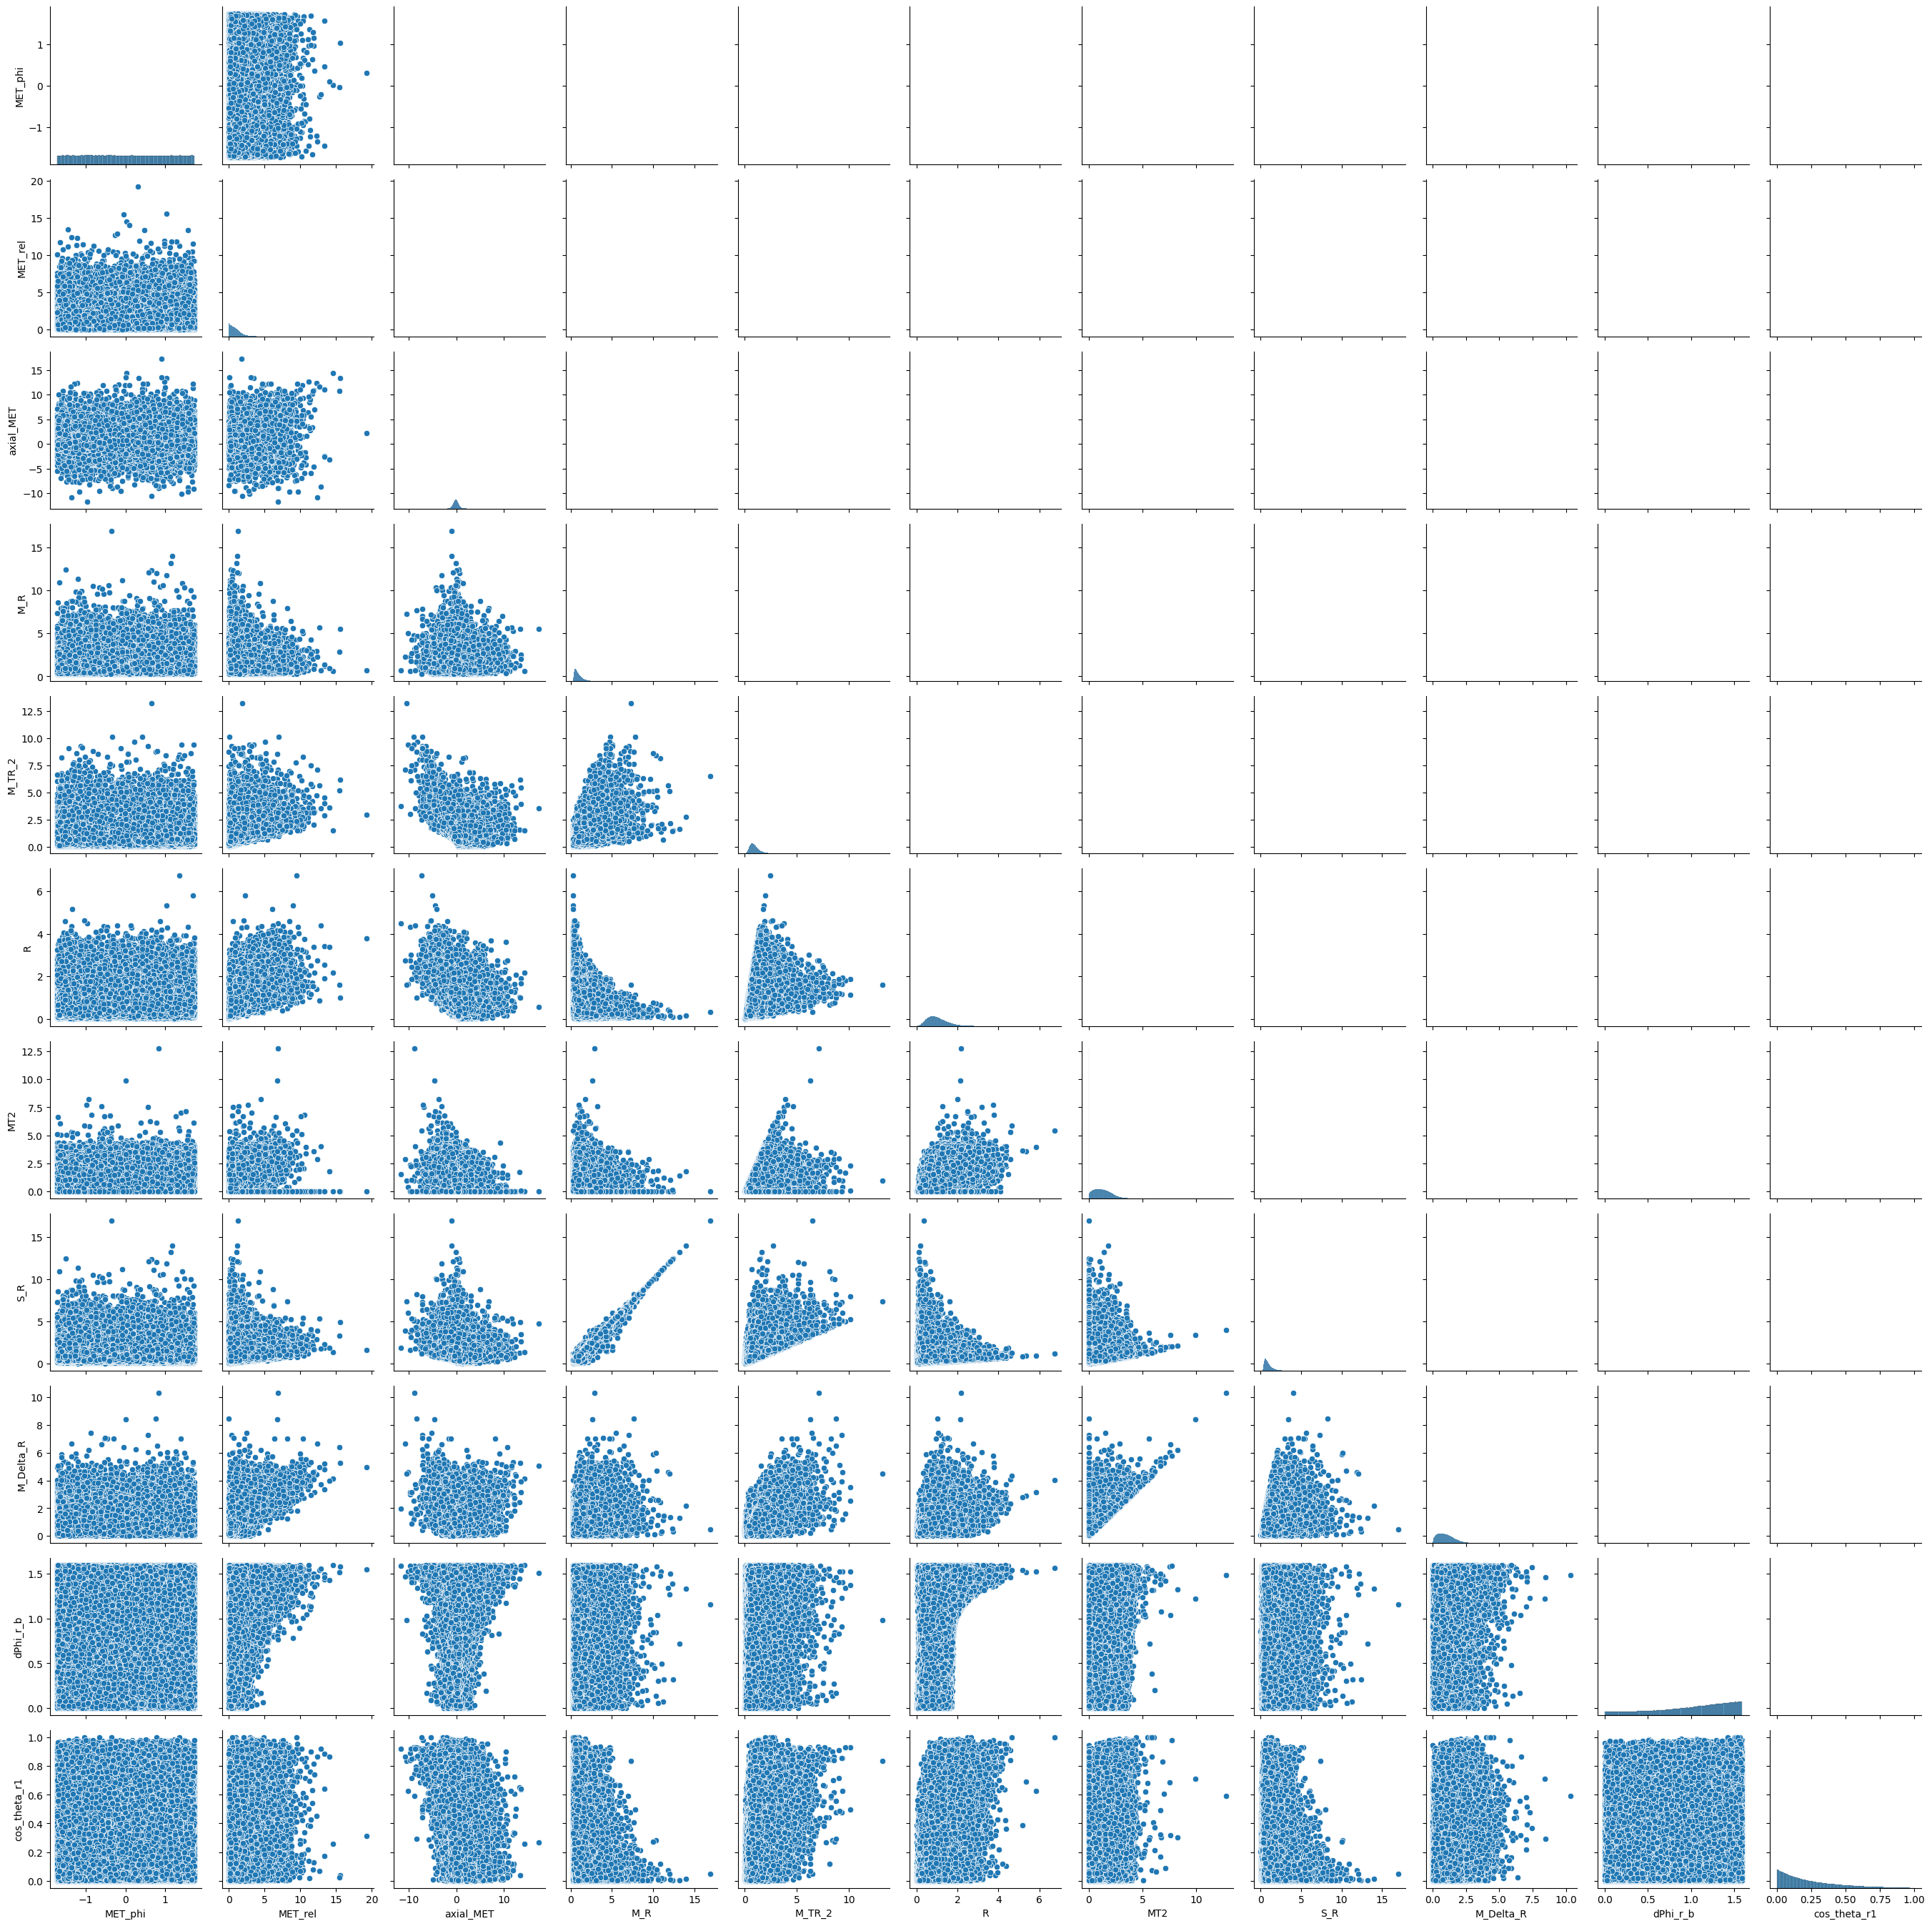

In [27]:
############################################################
import seaborn as sns

def snspairplot(susy_data):

    low_level_features = susy_data.iloc[:, :8]
    high_level_features = susy_data.iloc[:, 8:]

    print("Pair plots for Low-level Features")
    sns.pairplot(low_level_features)
    plt.show()

    print("Pair plots for High-level Features")
    sns.pairplot(high_level_features)
    plt.show()

snspairplot(df)


In [56]:
from IPython.display import HTML, display
import tabulate

In [57]:
#4.2.2
import numpy as np

all = np.random.rand(100, 10)  # 100 samples, 10 observables
low_high_features = np.random.rand(100, 5)  # 100 samples, 5 low-level features and 5 high-level features

covariance_all = np.cov(all, rowvar=False)#covariance and correlation matrices
correlation_all = np.corrcoef(all, rowvar=False)

low_features = low_high_features[:, :5]  # takes low-level features
high_features = low_high_features[:, 5:]

covariance_low = np.cov(low_features, rowvar=False) #computes covariance and correlation coefficient matrixs with the feature(low_features in this case)
correlation_low = np.corrcoef(low_features, rowvar=False)#rowvar is the argument that distinguishes between row and column so in this each volumn represents a variable, and if it was true it would be viceversa

covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)


print("Covariance matrix for all observables:")#prints matrices
print(covariance_all)
print("\nCorrelation matrix for all observables:")
print(correlation_all)

print("\nCovariance matrix for low-level features:")
print(covariance_low)
print("\nCorrelation matrix for low-level features:")
print(correlation_low)

print("\nCovariance matrix for high-level features:")
print(covariance_high)
print("\nCorrelation matrix for high-level features:")
print(correlation_high)


Covariance matrix for all observables:
[[ 0.08164903 -0.00115271  0.00892393 -0.00153995 -0.00389861 -0.00094229
   0.01592092  0.01426134 -0.00336355 -0.0049049 ]
 [-0.00115271  0.07134892 -0.00805024  0.00653737 -0.00773696 -0.00593835
  -0.01067215  0.00422872 -0.00760482  0.00550527]
 [ 0.00892393 -0.00805024  0.08729298  0.01074728 -0.00565943 -0.01235613
  -0.00259888  0.00601184 -0.00418058 -0.00136151]
 [-0.00153995  0.00653737  0.01074728  0.09448801  0.00322859  0.00041071
   0.0090052   0.02291672 -0.00281032 -0.00456725]
 [-0.00389861 -0.00773696 -0.00565943  0.00322859  0.08171863  0.01411007
  -0.01038567 -0.006851    0.01129195 -0.00136578]
 [-0.00094229 -0.00593835 -0.01235613  0.00041071  0.01411007  0.0822762
  -0.01223511  0.00470812 -0.00793273  0.00455362]
 [ 0.01592092 -0.01067215 -0.00259888  0.0090052  -0.01038567 -0.01223511
   0.08224308  0.01254304  0.01001342  0.0055777 ]
 [ 0.01426134  0.00422872  0.00601184  0.02291672 -0.006851    0.00470812
   0.01254304

In [58]:
import numpy as np
from tabulate import tabulate
#import libraries



covariance_all = np.cov(all, rowvar=False)
correlation_all = np.corrcoef(all, rowvar=False)
covariance_low = np.cov(low_features, rowvar=False)
correlation_low = np.corrcoef(low_features, rowvar=False)
covariance_high = np.cov(high_features, rowvar=False)
correlation_high = np.corrcoef(high_features, rowvar=False)

#copied from above, those were the coorelation and covariance matrices


headers = ["Feature"] + [f"Feature {i+1}" for i in range(len(all))]#creates header per feature for the amount of features in the data
table_cov_all = tabulate(covariance_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#table for covariance
table_corr_all = tabulate(correlation_all, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#correlation table formats the values in the table with three decimal places and specific format fancy grid
table_cov_low = tabulate(covariance_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")
table_corr_low = tabulate(correlation_low, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#low level feature table
table_cov_high = tabulate(covariance_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level feature table
table_corr_high = tabulate(correlation_high, headers=headers, floatfmt=".3f", tablefmt="fancy_grid")#high level correlation

print("Covariance Matrix of All Observables:")#all of these embed them into the notebook with nic headings
print(table_cov_all)
print("\nCorrelation Matrix of All Observables:")
print(table_corr_all)

print("\nCovariance Matrix of Low-level Features:")
print(table_cov_low)
print("\nCorrelation Matrix of Low-level Features:")
print(table_corr_low)

print("\nCovariance Matrix of High-level Features:")
print(table_cov_high)
print("\nCorrelation Matrix of High-level Features:")
print(table_corr_high)


Covariance Matrix of All Observables:
╒═══════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╕
│   Feature │   Feature 1 │   Feature 2 │   Feature 3 │   Feature 4 │   Feature 5 │   Feature 6 │   Feature 7 │   Feature 8 │   Feature 9 │
╞═══════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│     0.082 │      -0.001 │       0.009 │      -0.002 │      -0.004 │      -0.001 │       0.016 │       0.014 │      -0.003 │      -0.005 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┤
│    -0.001 │       0.071 │      -0.008 │       0.007 │      -0.008 │      -0.006 │      -0.011 │       0.004 │      -0.008 │       0.006 │
├───────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────────┼───────────

In [59]:
#5.1

# x>xc -- L_1_pT, L_2_pT, MET, M_TR_2, S_R M_R, MT2, cos_theta_r1, MET_rel
# x<xc -- dPhi_r_b,
#|x-mu|>xc -- L_1_eta, L_1_phi, L_2_eta, L_2__phi, MET_phi, R, M_TR_2, axial_MET, M_Delta_R
# |x-mu|<xc --

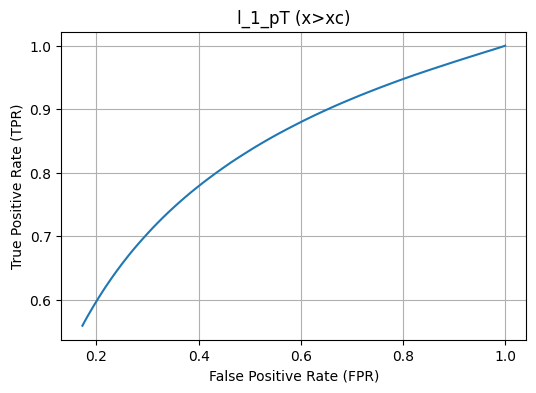

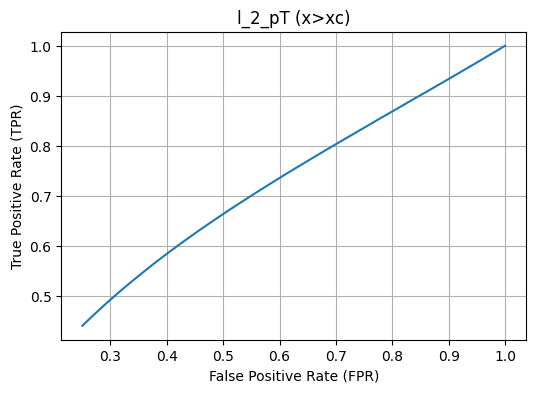

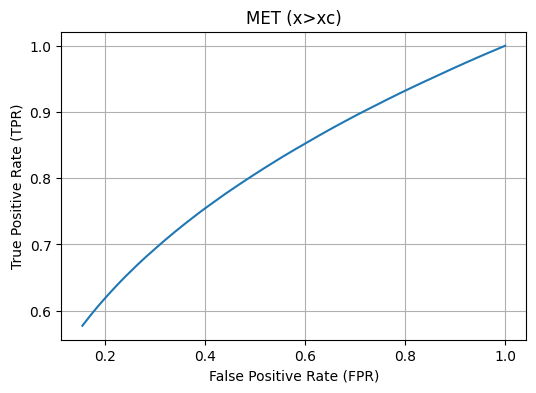

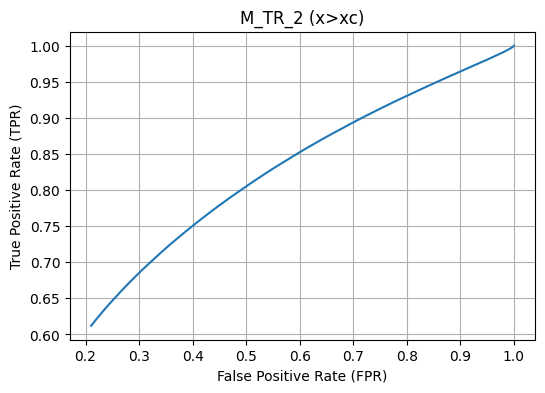

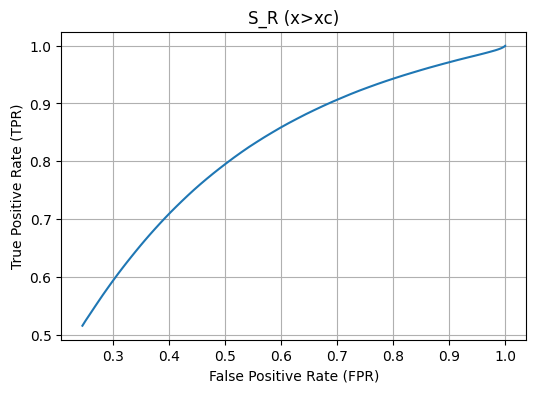

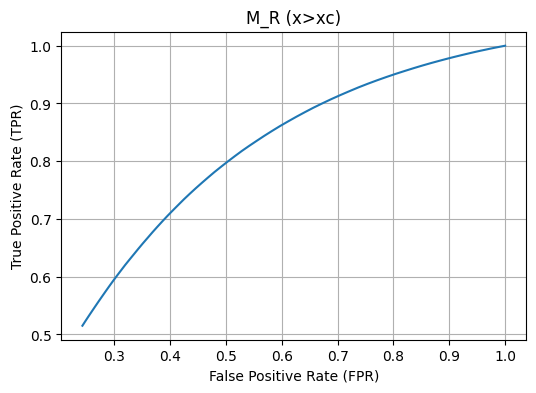

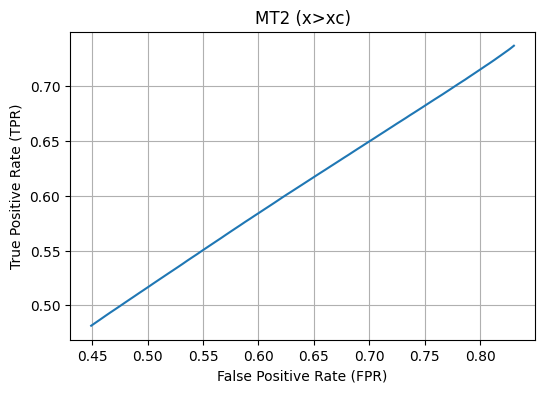

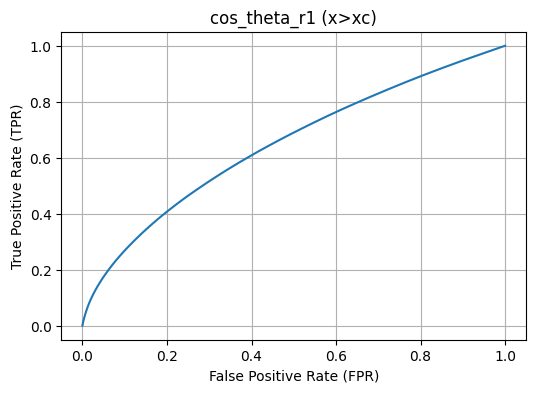

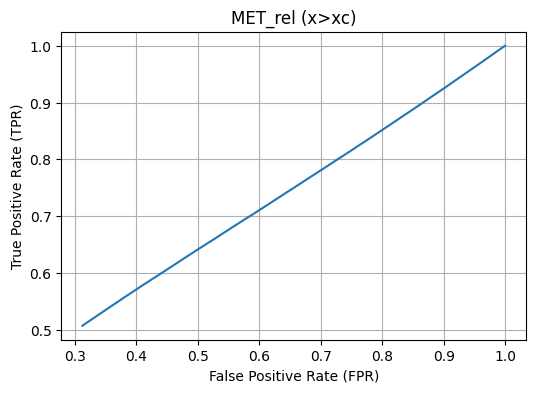

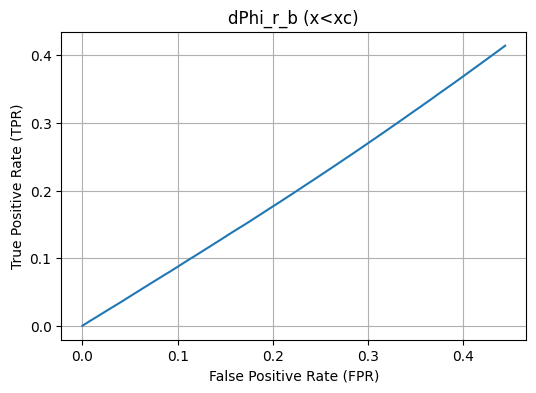

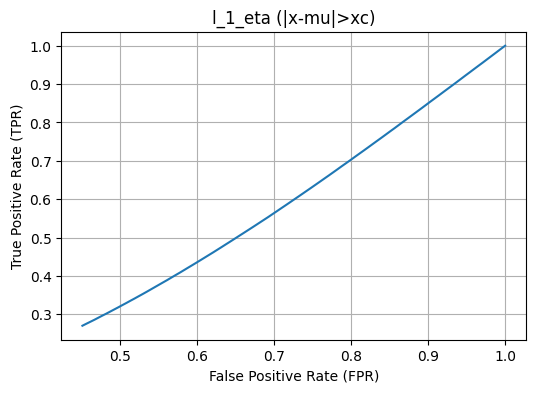

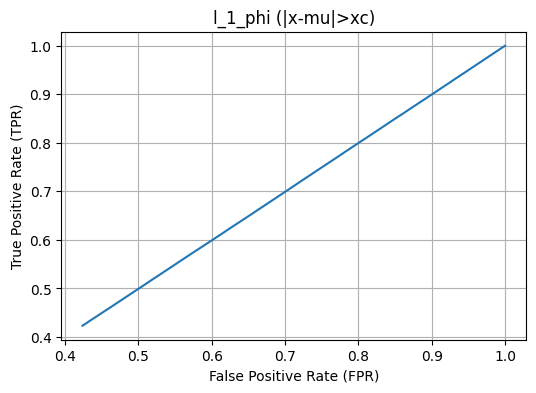

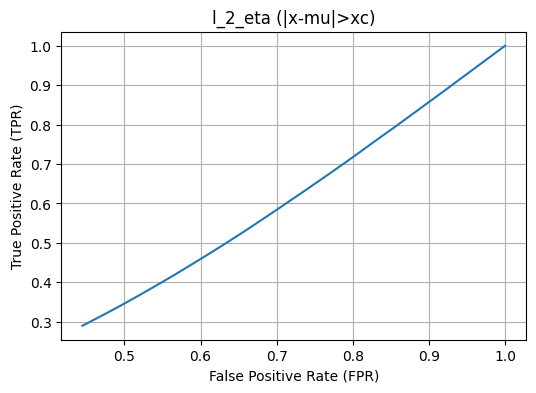

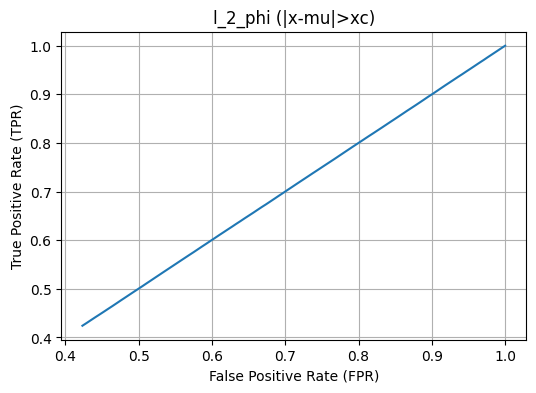

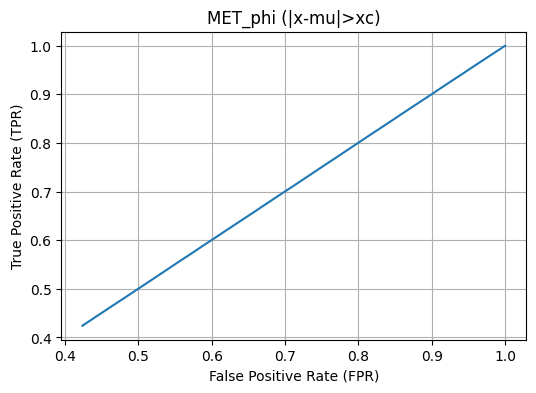

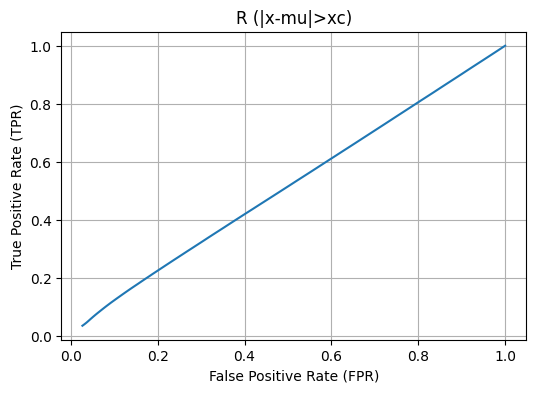

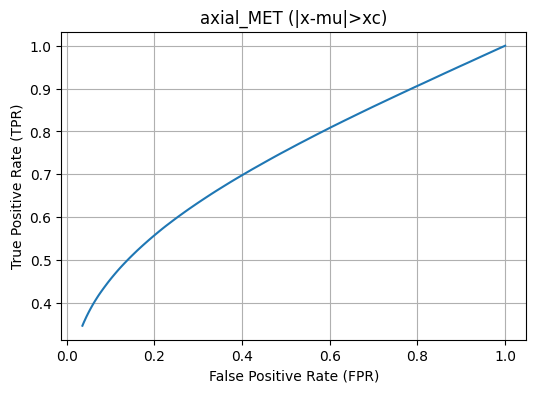

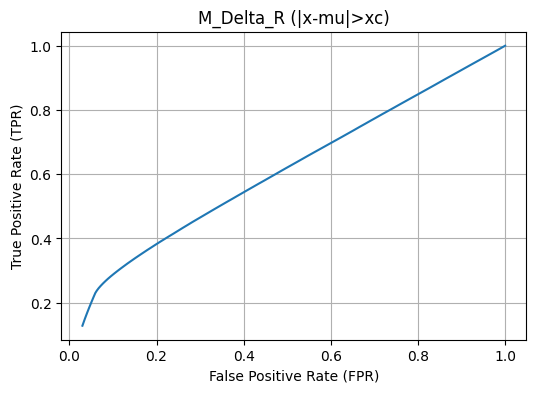

In [40]:
#5.2

import matplotlib.pyplot as plt
import numpy as np

#sets this to each of 3 conditions (since none used the fourth condition)
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        #sum of signal data instances being above threshold
        signal_above_threshold = np.sum(signal_data > thresholds)
        #same but with background data
        background_above_threshold = np.sum(background_data > thresholds)
   #condition 2
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
   #condition 3
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of column names and their corresponding conditions
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

# Loop through each column, create individual plots
for column, condition in columns_conditions.items():
    plt.figure(figsize=(6, 4))

    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values)
    plt.title(f'{column} ({condition})')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)
    plt.show()



In [99]:
#5.3
!pip install tabulate
import tabulate

def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):

    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)

    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs



In [100]:

def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

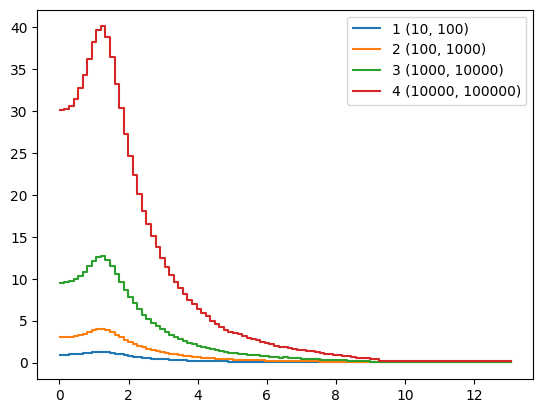

In [101]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

MET


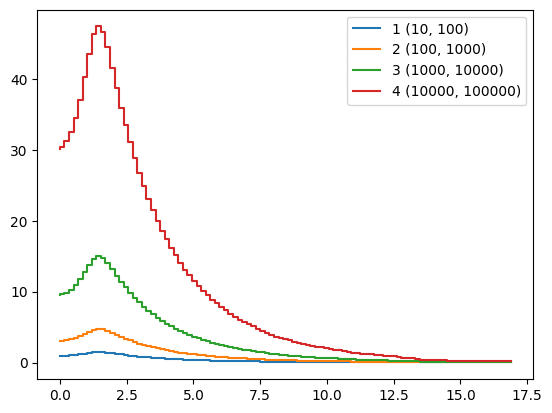

MET_phi


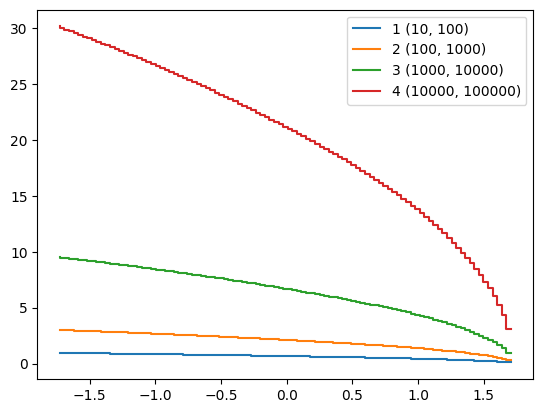

MET_rel


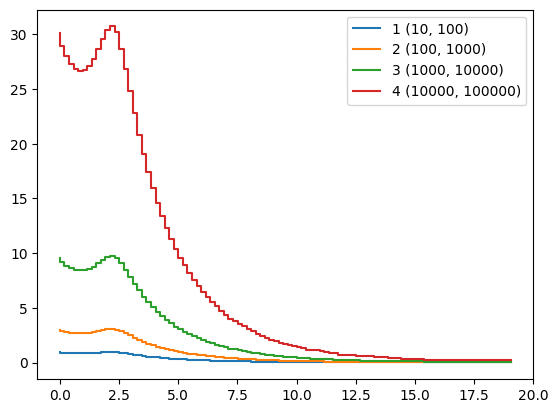

axial_MET


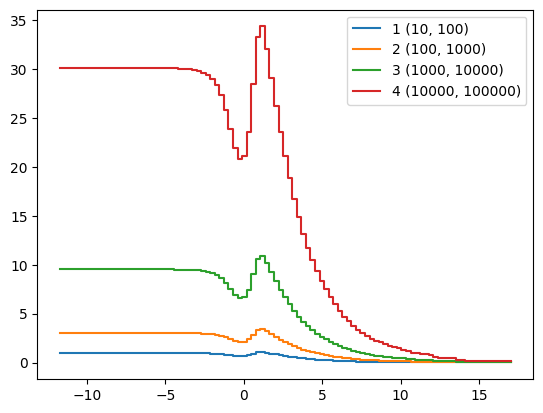

M_R


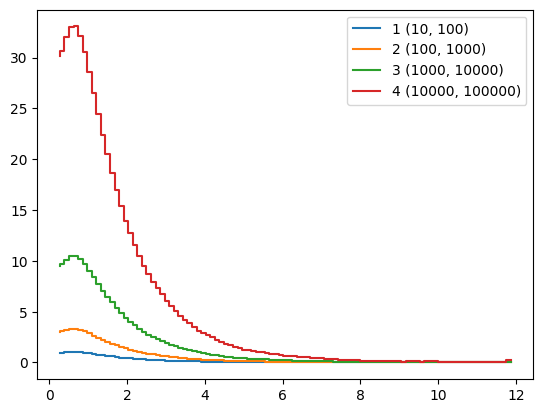

M_TR_2


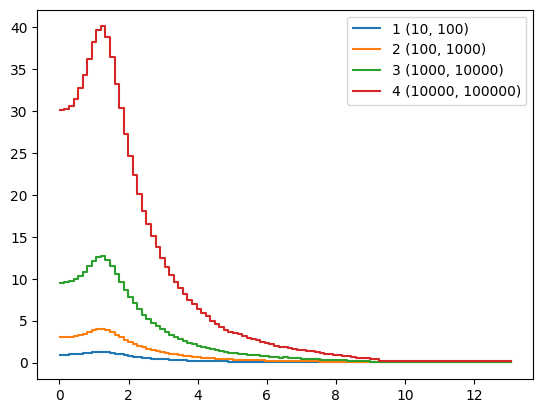

R


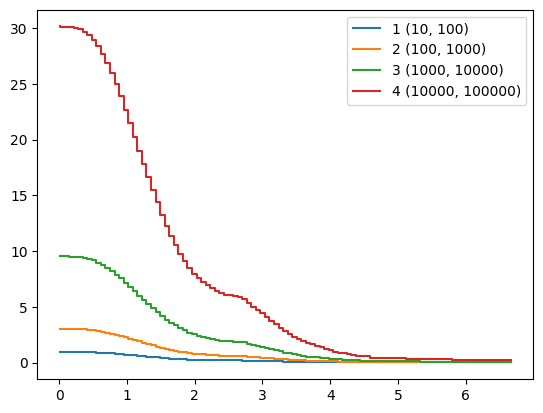

MT2


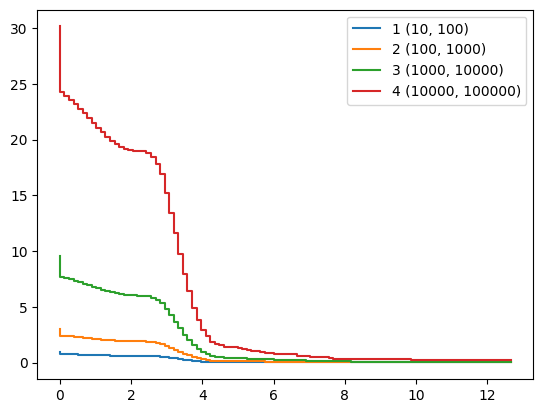

S_R


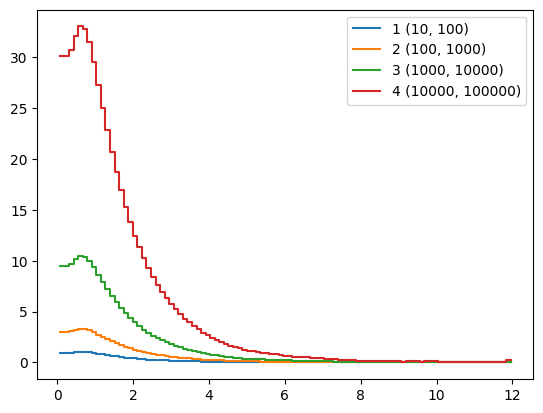

M_Delta_R


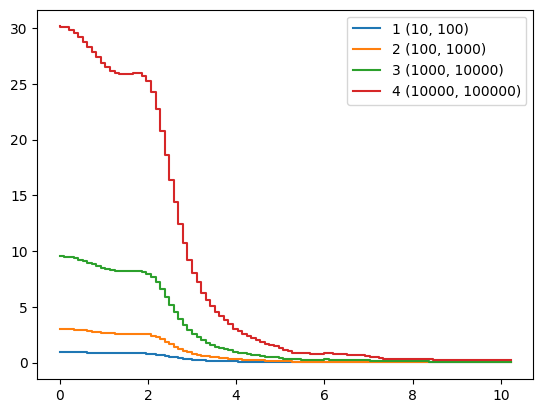

dPhi_r_b


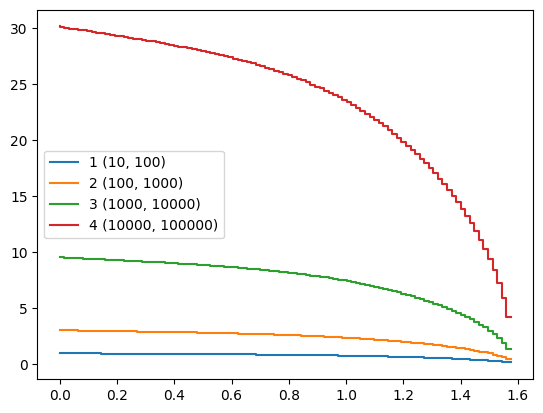

cos_theta_r1


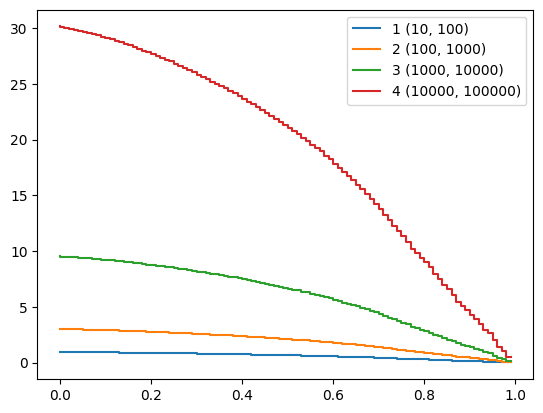

In [71]:

my_obs= ['MET',
 'MET_phi',
 'MET_rel',
 'axial_MET',
 'M_R',
 'M_TR_2',
 'R',
 'MT2',
 'S_R',
 'M_Delta_R',
 'dPhi_r_b',
 'cos_theta_r1']

for obs in my_obs:
    print(obs)
    _=compare_significance(df_sig,df_bkg,obs,scenarios)

In [ ]:
6.1
# "M_Delta_R","M_TR_2", "MET"

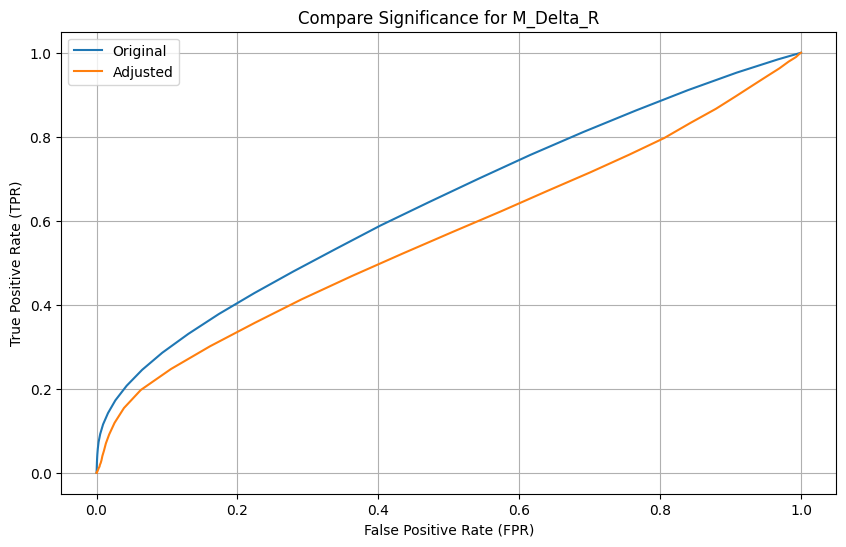

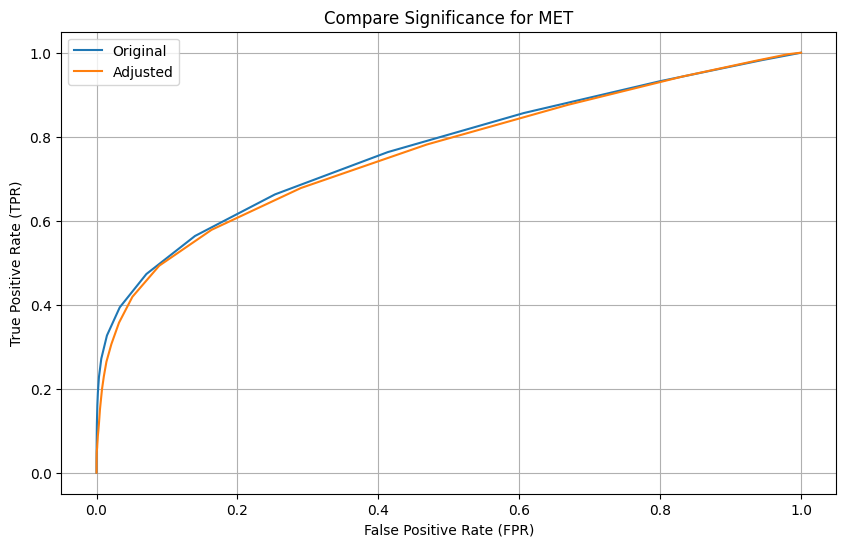

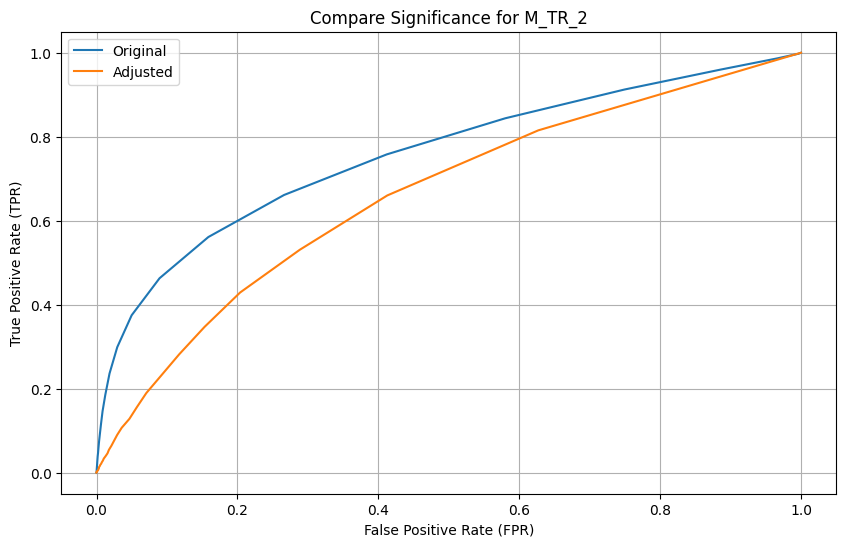

In [104]:
#6.2 added up lecture/lab codes
def compute_rate(d, bins=100):
    hist, bins_ = np.histogram(d, bins=bins, density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1] - bins_[0])
    return R, bins_

def compare_significance(obs_data_sig, obs_data_bkg, obs_name, scenarios, thresholds, bins=100):
    TPR, bins_sig = compute_rate(obs_data_sig, bins=bins)
    FPR, bins_sig = compute_rate(obs_data_bkg, bins=bins_sig)

    max_sigs = dict()
    table = list()

    for x_subc, (n_sig_expected, n_bkg_expected) in zip(thresholds, scenarios):
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime)

        max_i = np.argmax(sig)
        max_sigs[x_subc] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i])
        table.append((x_subc, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i],
                      n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i], max_i))

    return max_sigs, TPR, FPR, bins_sig, table

# Select subset of data based on condition
df_sig_1 = df_sig[df_sig["M_TR_2"] > 1.35029]
df_bkg_1 = df_bkg[df_bkg["M_TR_2"] > 1.35029]

# Define scenarios
scenarios = {
    "M_Delta_R": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)],
    "MET": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)],
    "M_TR_2": [(10, 100), (100, 1000), (1000, 10000), (10000, 100000)]
}

thresholds = [-1, -1, -1]

# Calculate efficiencies
eff_s = df_sig_1.shape[0] / df_sig.shape[0]
eff_b = df_bkg_1.shape[0] / df_bkg.shape[0]

# Adjust scenarios based on efficiencies
scenarios_1 = {obs: [(eff_s * n_sig, eff_b * n_bkg) for n_sig, n_bkg in values] for obs, values in scenarios.items()}

# Compare significance for the original and adjusted scenarios
results_original = {}
results_adjusted = {}
for obs in scenarios.keys():
    results_original[obs] = compare_significance(df_sig[obs], df_bkg[obs], obs, scenarios[obs], thresholds)
    results_adjusted[obs] = compare_significance(df_sig_1[obs], df_bkg_1[obs], obs, scenarios_1[obs], thresholds)

# Plot the last two compare significance graphs
for obs in results_original.keys():
    _, TPR_orig, FPR_orig, bins_orig, _ = results_original[obs]
    _, TPR_adj, FPR_adj, bins_adj, _ = results_adjusted[obs]

    plt.figure(figsize=(10, 6))
    plt.plot(FPR_orig, TPR_orig, label='Original')
    plt.plot(FPR_adj, TPR_adj, label='Adjusted')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Compare Significance for {obs}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [108]:
#6.3


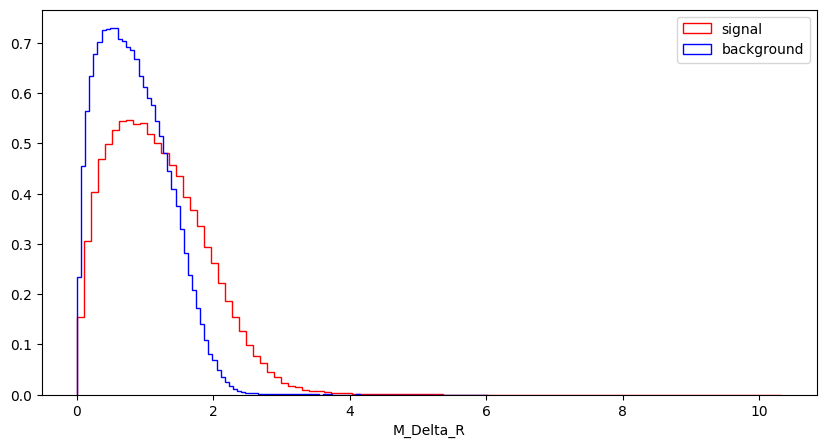

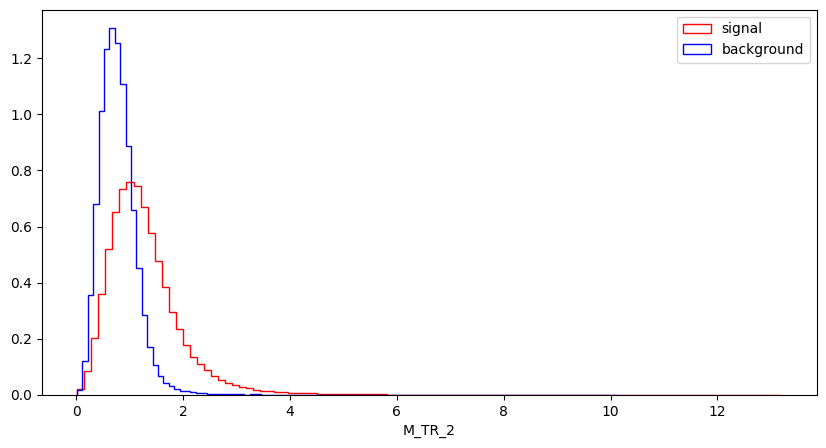

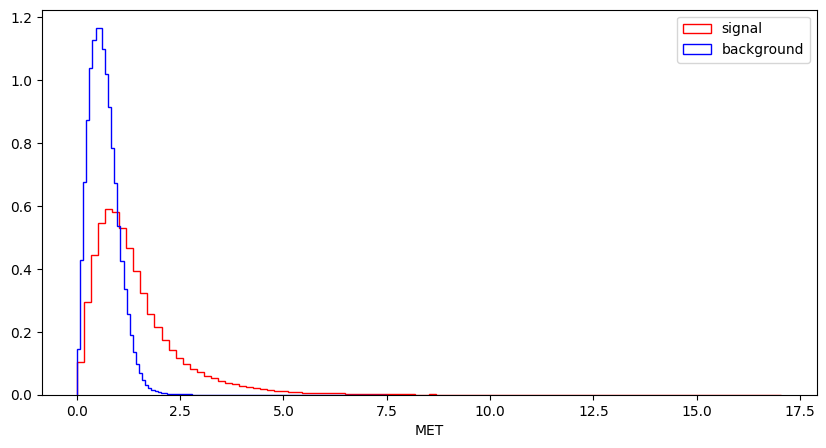

In [109]:
for var in ["M_Delta_R","M_TR_2", "MET"]:
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(var)
    plt.show()

In [111]:

TPR_1=sum(df_sig["M_Delta_R"]>2.)/df_sig.shape[0]
FPR_1=sum(df_bkg["M_Delta_R"]>2.)/df_bkg.shape[0]


##
TPR_2=sum(df_sig["MET"]>2.)/df_sig.shape[0]
FPR_2=sum(df_bkg["MET"]>2.)/df_bkg.shape[0]

##
TPR_3=sum(df_sig["MET"]>2.)/df_sig.shape[0]
FPR_3=sum(df_bkg["MET"]>2.)/df_bkg.shape[0]


print(TPR_1)
print(FPR_1)

print(TPR_2)
print(FPR_2)

print(TPR_3)
print(FPR_3)

0.1328796702218151
0.013853853114439253
0.20014831294030405
0.0022825063249062804
0.20014831294030405
0.0022825063249062804


In [116]:
TPR_1_2=sum((TPR_1,TPR_2,TPR_3))
FPR_1_2=sum((FPR_1,FPR_2,FPR_3))

print(TPR_1_2)
print(FPR_1_2)

0.5331762961024231
0.01841886576425181


In [120]:
print(TPR_1*TPR_2*TPR_3)
print(FPR_1*FPR_2*FPR_3)

0.005323072841629493
7.217629054777433e-08


In [125]:
display(HTML(tabulate.tabulate([[ TPR_1, TPR_2, TPR_3, TPR_1*TPR_2, TPR_2*TPR_3, TPR_1*TPR_3, TPR_1_2],
                                 [FPR_1, FPR_2, FPR_3, FPR_1*FPR_2, FPR_2*FPR_3, FPR_1*FPR_3, FPR_1_2]],
                               tablefmt='html',
                               headers=['Cut 1','Cut 2', 'Cut 3', 'Cut 1 * Cut 2', 'Cut 2 * Cut 3', 'Cut 1 * Cut 3','Cut 1 & Cut 2 & Cut 3'])))

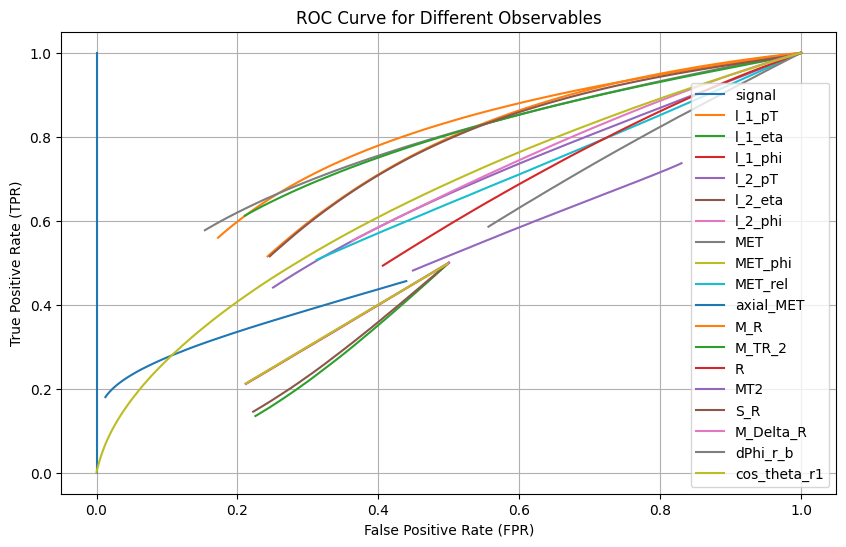

In [35]:
#####################################################ignore

import matplotlib.pyplot as plt
import numpy as np
column_names = df_sig.columns

plt.figure(figsize=(10, 6))

# Loop
for column in column_names:
    # Get signal and background data
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    # Calculate TPR and FPR
    thresholds = np.linspace(0, 1, 100)
    TPR_values = np.sum((signal_data[:, np.newaxis] > thresholds), axis=0) / len(signal_data)
    FPR_values = np.sum((background_data[:, np.newaxis] > thresholds), axis=0) / len(background_data)

    # Plot ROC curve for each column
    plt.plot(FPR_values, TPR_values, label=column)

# Plotting settings
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Observables')
plt.legend()
plt.grid(True)
plt.show()


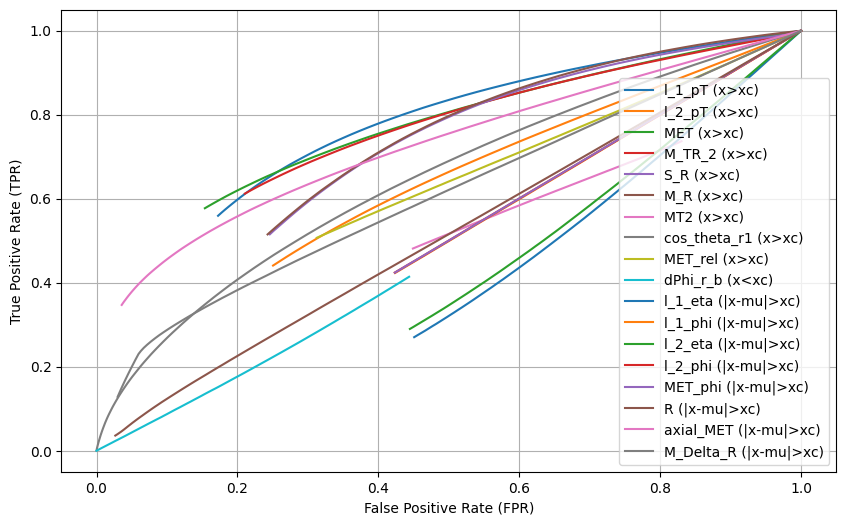

In [39]:
#ROC CURVE for all observables
import matplotlib.pyplot as plt
import numpy as np
#sets this to each of 3 conditions (since none used the fourth condition)
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        #sum of signal data instances being above threshold
        signal_above_threshold = np.sum(signal_data > thresholds)
        #same but with background data
        background_above_threshold = np.sum(background_data > thresholds)
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of column names and their corresponding conditions
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

plt.figure(figsize=(10, 6))

#loops through each column, condition, gets signal and backgroun data
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


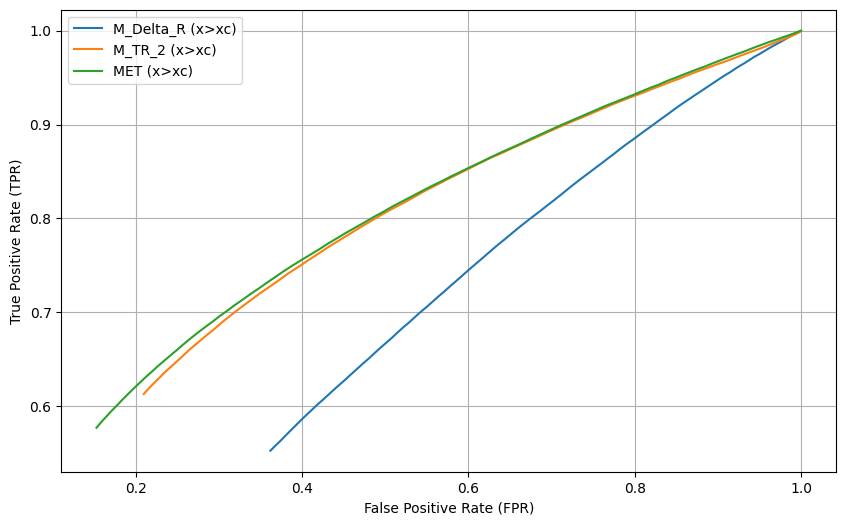

In [126]:
#7.1
import matplotlib.pyplot as plt
import numpy as np

#sets this to each of 3 conditions (since none used the fourth condition)
#borrowed from code above
def calculate_rates(signal_data, background_data, thresholds, condition):
    if condition == 'x>xc':
        signal_above_threshold = np.sum(signal_data > thresholds)
        background_above_threshold = np.sum(background_data > thresholds)
    elif condition == 'x<xc':
        signal_above_threshold = np.sum(signal_data < thresholds)
        background_above_threshold = np.sum(background_data < thresholds)
    elif condition == '|x-mu|>xc':
        signal_above_threshold = np.sum(np.abs(signal_data - np.mean(signal_data)) > thresholds)
        background_above_threshold = np.sum(np.abs(background_data - np.mean(background_data)) > thresholds)
    else:
        raise ValueError("Invalid condition provided.")

    TPR = signal_above_threshold / len(signal_data)
    FPR = background_above_threshold / len(background_data)
    return TPR, FPR

#list of obserbables names and their corresponding conditions
selected_observables = ["M_Delta_R", "M_TR_2", "MET"]
columns_conditions = {obs: 'x>xc' for obs in selected_observables}

#ROC curves for selected observables
plt.figure(figsize=(10, 6))
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


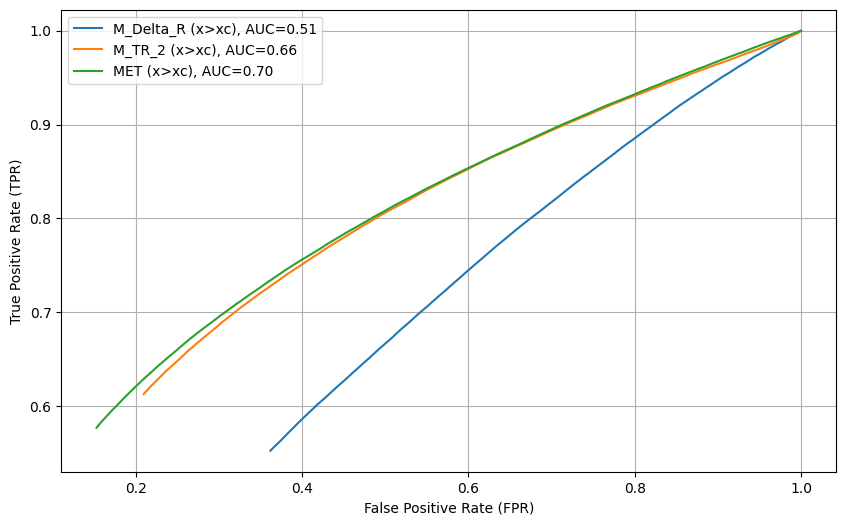

In [130]:
plt.figure(figsize=(10, 6))
for column, condition in columns_conditions.items():
    signal_data = df_sig[column].values
    background_data = df_bkg[column].values

    thresholds = np.linspace(0, 1, 100)
    TPR_values = []
    FPR_values = []
    for threshold in thresholds:
        TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
        TPR_values.append(TPR)
        FPR_values.append(FPR)

    #AUC using the trapezoidal rule given from the lab
    AUC = 0
    for k in range(len(FPR_values) - 1):
        AUC += (FPR_values[k] - FPR_values[k + 1]) * (TPR_values[k] + TPR_values[k + 1]) / 2

    #ROC curve
    plt.plot(FPR_values, TPR_values, label=f'{column} ({condition}), AUC={AUC:.2f}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()


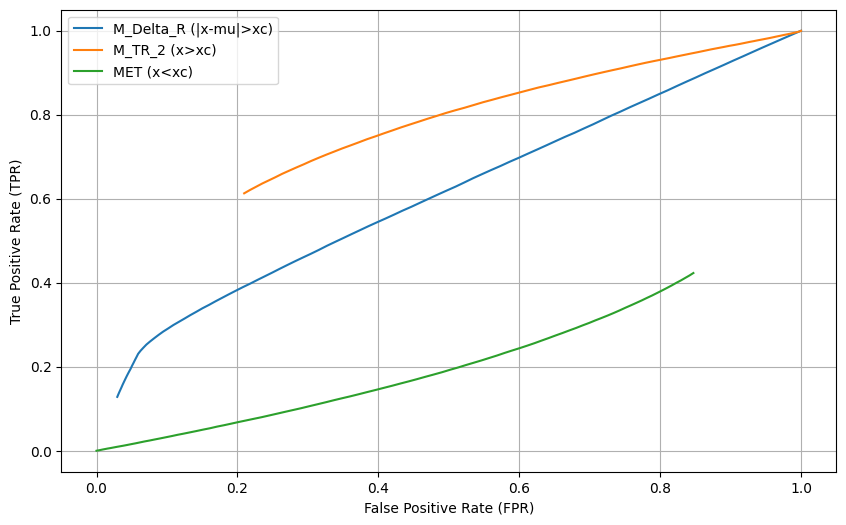

In [132]:
#7.2
import matplotlib.pyplot as plt
import numpy as np

def plot_ROC_curves(data_sig, data_bkg, columns_conditions):
    plt.figure(figsize=(10, 6))

    for column, condition in columns_conditions.items():
        signal_data = data_sig[column].values
        background_data = data_bkg[column].values

        thresholds = np.linspace(0, 1, 100)
        TPR_values = []
        FPR_values = []
        for threshold in thresholds:
            TPR, FPR = calculate_rates(signal_data, background_data, threshold, condition)
            TPR_values.append(TPR)
            FPR_values.append(FPR)

        plt.plot(FPR_values, TPR_values, label=f'{column} ({condition})')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid(True)
    plt.show()

columns_conditions = {
    'M_Delta_R': '|x-mu|>xc',
    'M_TR_2': 'x>xc',
    'MET': 'x<xc'
}
plot_ROC_curves(df_sig, df_bkg, columns_conditions)


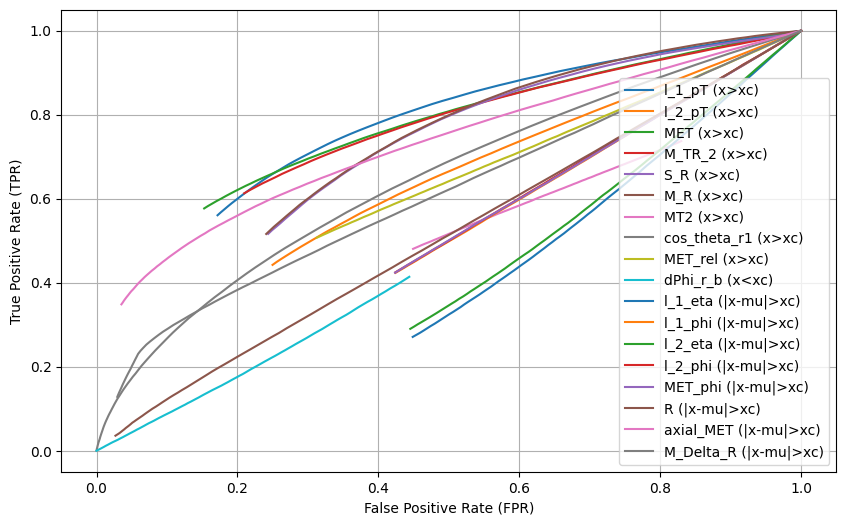

In [133]:
#7.3
#all columns
columns_conditions = {
    'l_1_pT': 'x>xc',
    'l_2_pT': 'x>xc',
    'MET': 'x>xc',
    'M_TR_2': 'x>xc',
    'S_R': 'x>xc',
    'M_R': 'x>xc',
    'MT2': 'x>xc',
    'cos_theta_r1': 'x>xc',
    'MET_rel': 'x>xc',
    'dPhi_r_b': 'x<xc',
    'l_1_eta': '|x-mu|>xc',
    'l_1_phi': '|x-mu|>xc',
    'l_2_eta': '|x-mu|>xc',
    'l_2_phi': '|x-mu|>xc',
    'MET_phi': '|x-mu|>xc',
    'R': '|x-mu|>xc',
    'axial_MET': '|x-mu|>xc',
    'M_Delta_R': '|x-mu|>xc'
}

plot_ROC_curves(df_sig, df_bkg, columns_conditions)


Scenario 1: Selection on 'M_TR_2' first, then optimization on 'M_Delta_R'


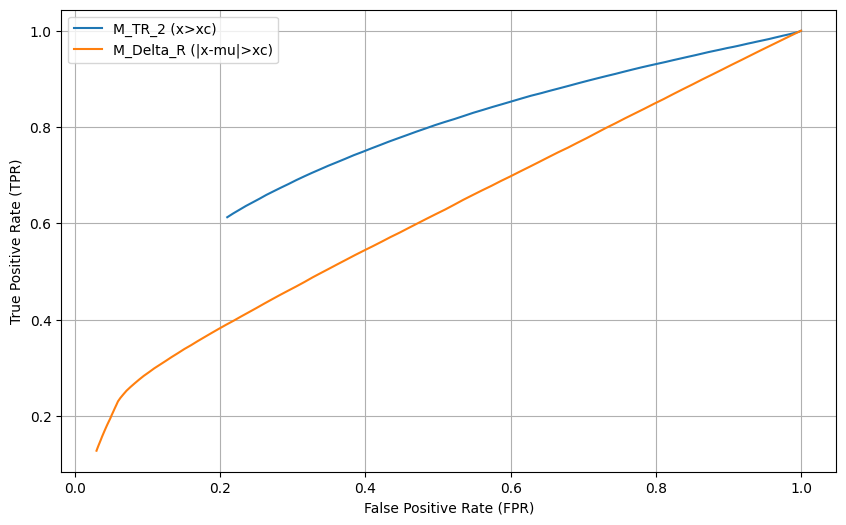

Scenario 2: Selection on 'M_Delta_R' first, then optimization on 'M_TR_2'


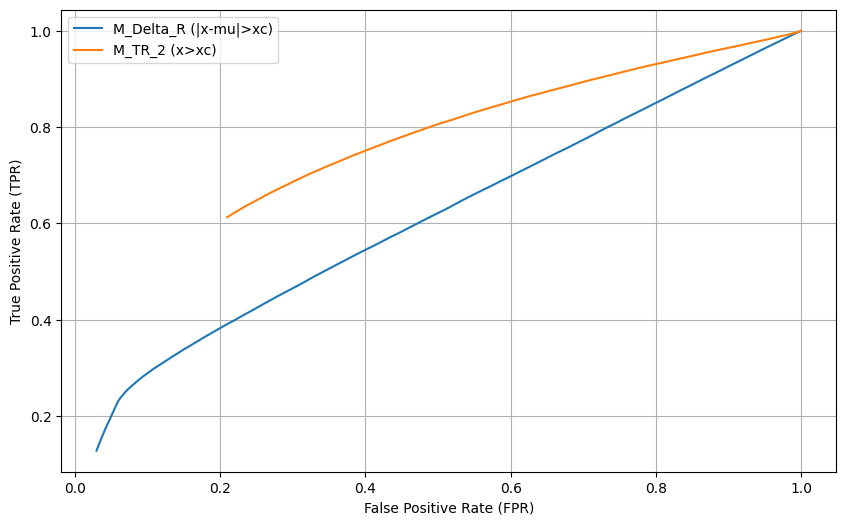

In [134]:
#7.4

scenario_1 = {
    'M_TR_2': 'x>xc',
    'M_Delta_R': '|x-mu|>xc'
}

scenario_2 = {
    'M_Delta_R': '|x-mu|>xc',
    'M_TR_2': 'x>xc'
}

print("Scenario 1: Selection on 'M_TR_2' first, then optimization on 'M_Delta_R'")
plot_ROC_curves(df_sig, df_bkg, scenario_1)

print("Scenario 2: Selection on 'M_Delta_R' first, then optimization on 'M_TR_2'")
plot_ROC_curves(df_sig, df_bkg, scenario_2)


In [ ]:
#8.1
